In [4]:
import networkx as nx
from pyvis.network import Network
import community
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from latex import latexify
latexify(columns = 2)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# **Zachary's Karate Club**

In [60]:
G = nx.karate_club_graph()

# nt = Network(height = "1080px", width = "100%", notebook = True, cdn_resources = "remote")

for node in G.nodes:
    G.nodes[node]["label"] = str(node)
    if G.nodes[node]["club"] == "Mr. Hi":
        G.nodes[node]["color"] = "blue"
    else:
        G.nodes[node]["color"] = "red"

# nt.from_nx(G)
# nt.show("karate.html")

print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("Average degree: ", np.mean([d for n, d in G.degree()]))
print("Clustering coefficient: ", nx.average_clustering(G))
print("Average shortest path length: ", nx.average_shortest_path_length(G))
print("Modularity: ", community.modularity(community.best_partition(G), G))
print("Number of communities: ", len(set(community.best_partition(G).values())))
print("Community sizes: ", pd.Series(list(community.best_partition(G).values())).value_counts().sort_index().values)

Number of nodes:  34
Number of edges:  78
Average degree:  4.588235294117647
Clustering coefficient:  0.5706384782076823
Average shortest path length:  2.408199643493761
Modularity:  0.4276718952043627
Number of communities:  3
Community sizes:  [11  6  5 12]


In [63]:
dit = nx.edge_betweenness_centrality(G)
edges_tuples = sorted(dit.items(), key = lambda x: x[1], reverse = True)
print(edges_tuples[:5])

[((0, 31), 0.1272599949070537), ((0, 6), 0.07813428401663695), ((0, 5), 0.07813428401663694), ((0, 2), 0.0777876807288572), ((0, 8), 0.07423959482783014)]


In [64]:
ccomp = nx.connected_components(G)
print("Number of connected components: ", nx.number_connected_components(G))

Number of connected components:  1


<generator object connected_components at 0x330510c10>

# $$ \text{Girvan-Newman Algorithm} $$
$$ \text{Based upon the edge-betweenness} \to $$
$$ \text{Fraction of the times an edge gets crossed in a shortest path traversal across all node pairs} $$

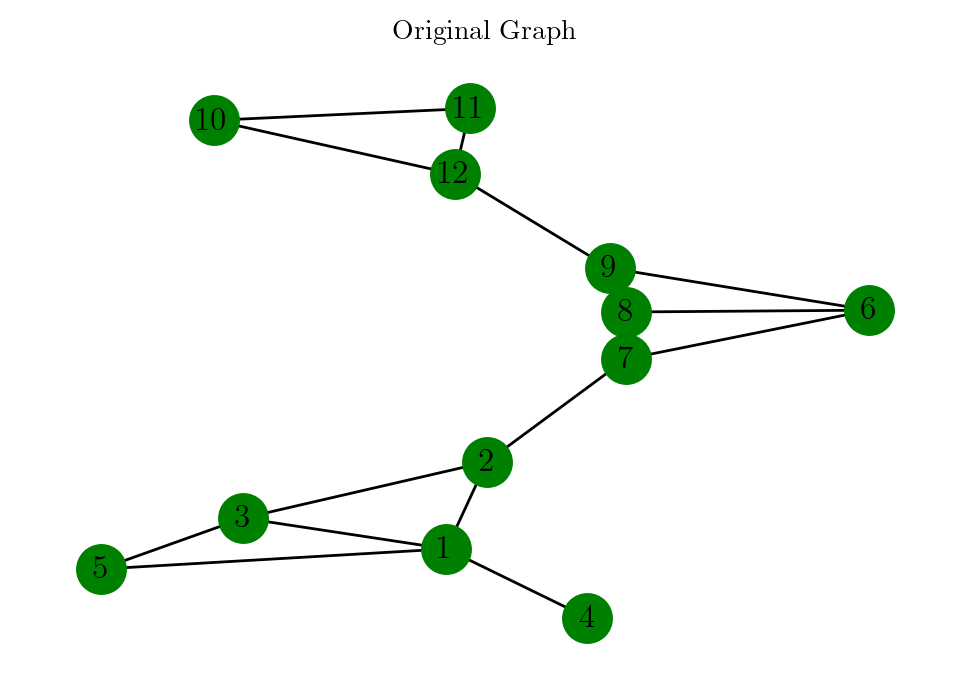

In [105]:
G = nx.Graph()
G.add_edges_from([[1, 2], [2, 3], [1, 3], [1, 4], [1, 5], [3, 5],
                  [6, 7], [7, 8], [8, 9], [6, 9], [6, 8], [7, 9],
                  [10, 11], [11, 12], [10, 12], 
                  [9, 12], [2, 7]])

plt.figure(figsize = (6, 4))
plt.title("Original Graph")
nx.draw(G, with_labels = True, node_color = "green", pos = nx.spring_layout(G, scale = 4), node_size = 300)

In [101]:
def plotEdgeBetweenness(G, title):
    edge_betweenness = list(nx.edge_betweenness_centrality(G).values())
    plt.figure(figsize = (10, 5))
    plt.title(title)
    plt.plot(edge_betweenness, marker = "o")

    for i, txt in enumerate(edge_betweenness):
        plt.annotate(f"{txt:.5f}", (i, edge_betweenness[i]))

    plt.xticks(range(len(edge_betweenness)), [f"({e[0]}, {e[1]})" for e in G.edges()], rotation = 90)
    plt.xlabel("Edges")
    plt.ylabel("Edge Betweenness")
    plt.show()

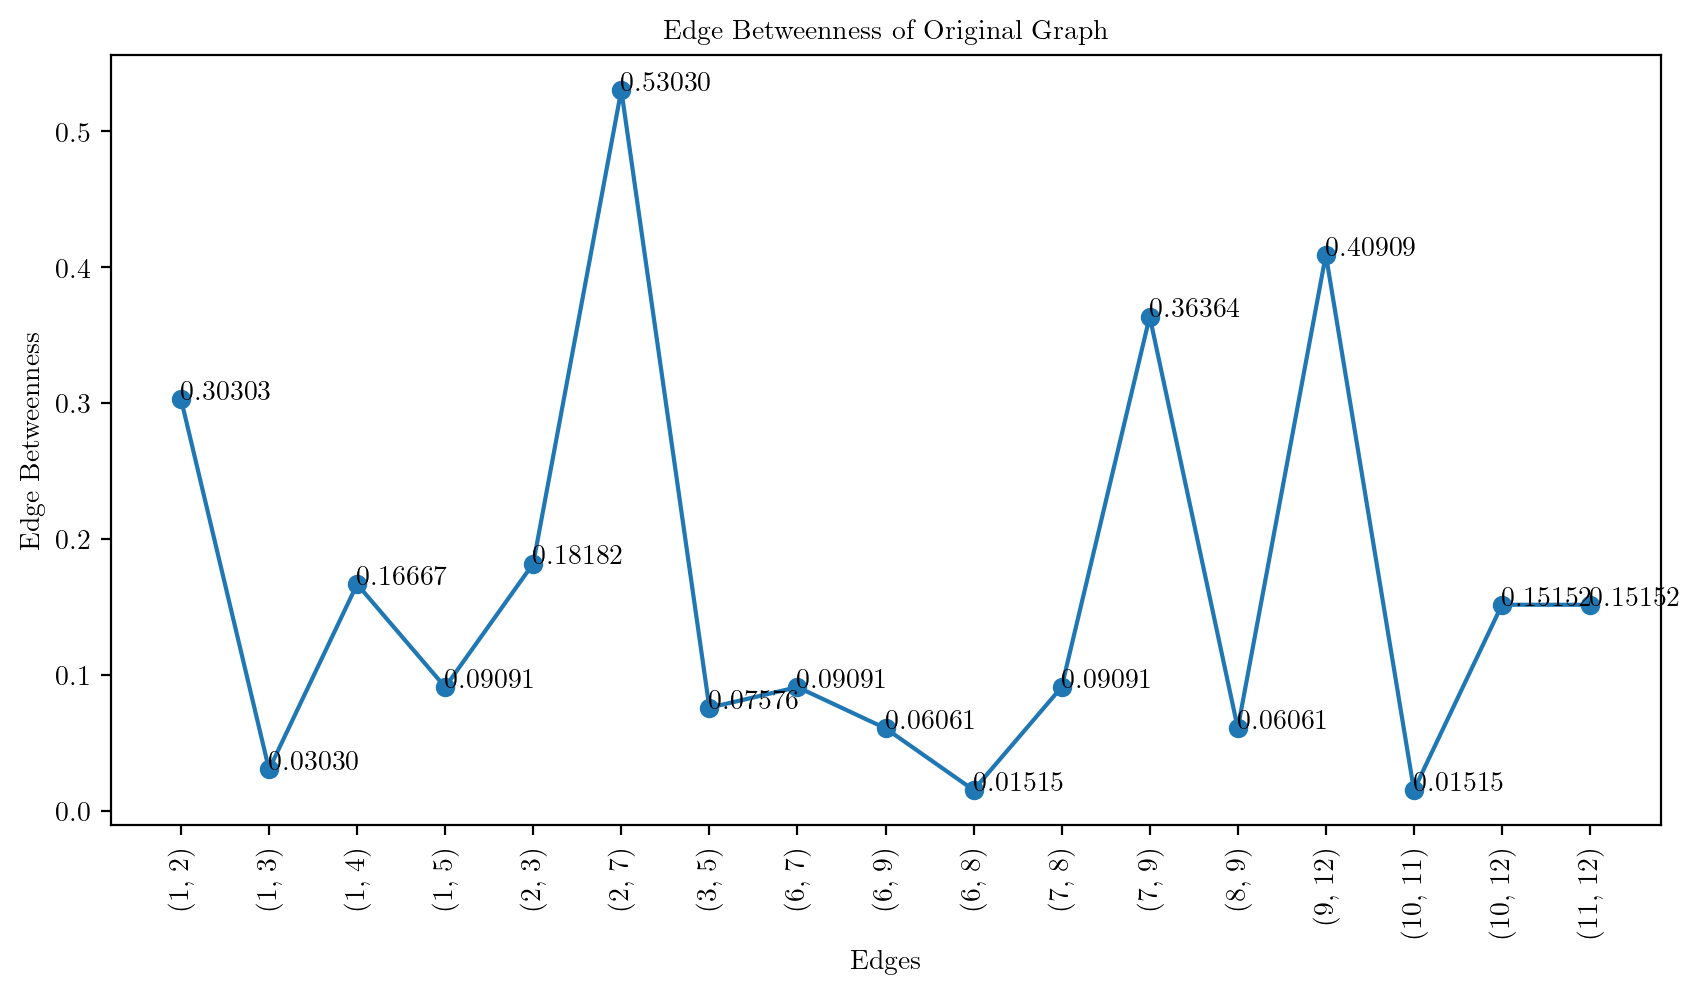

In [102]:
plotEdgeBetweenness(G, "Edge Betweenness of Original Graph")

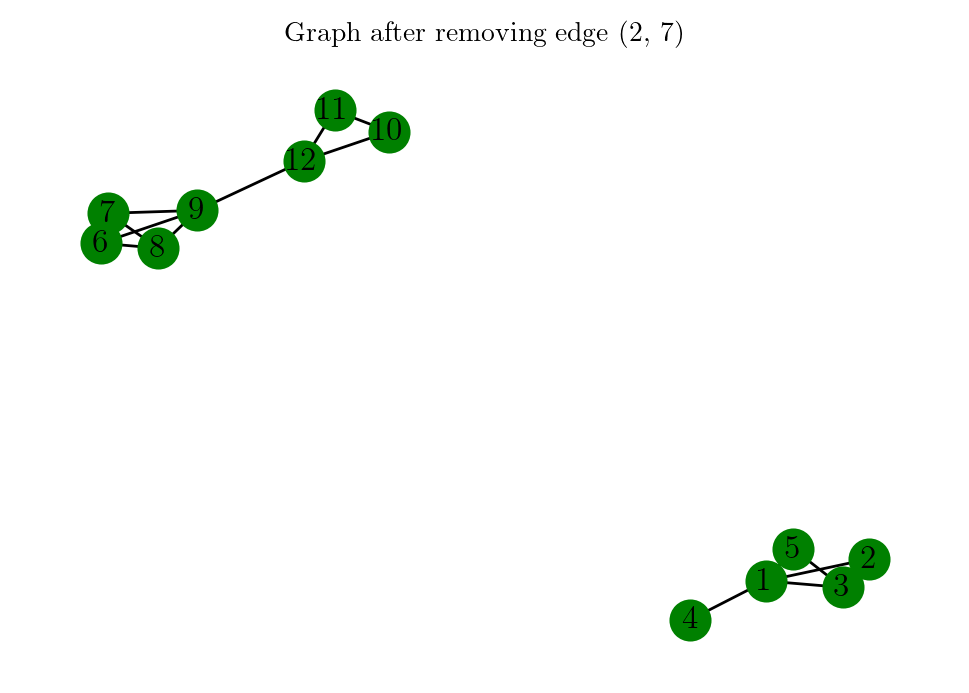

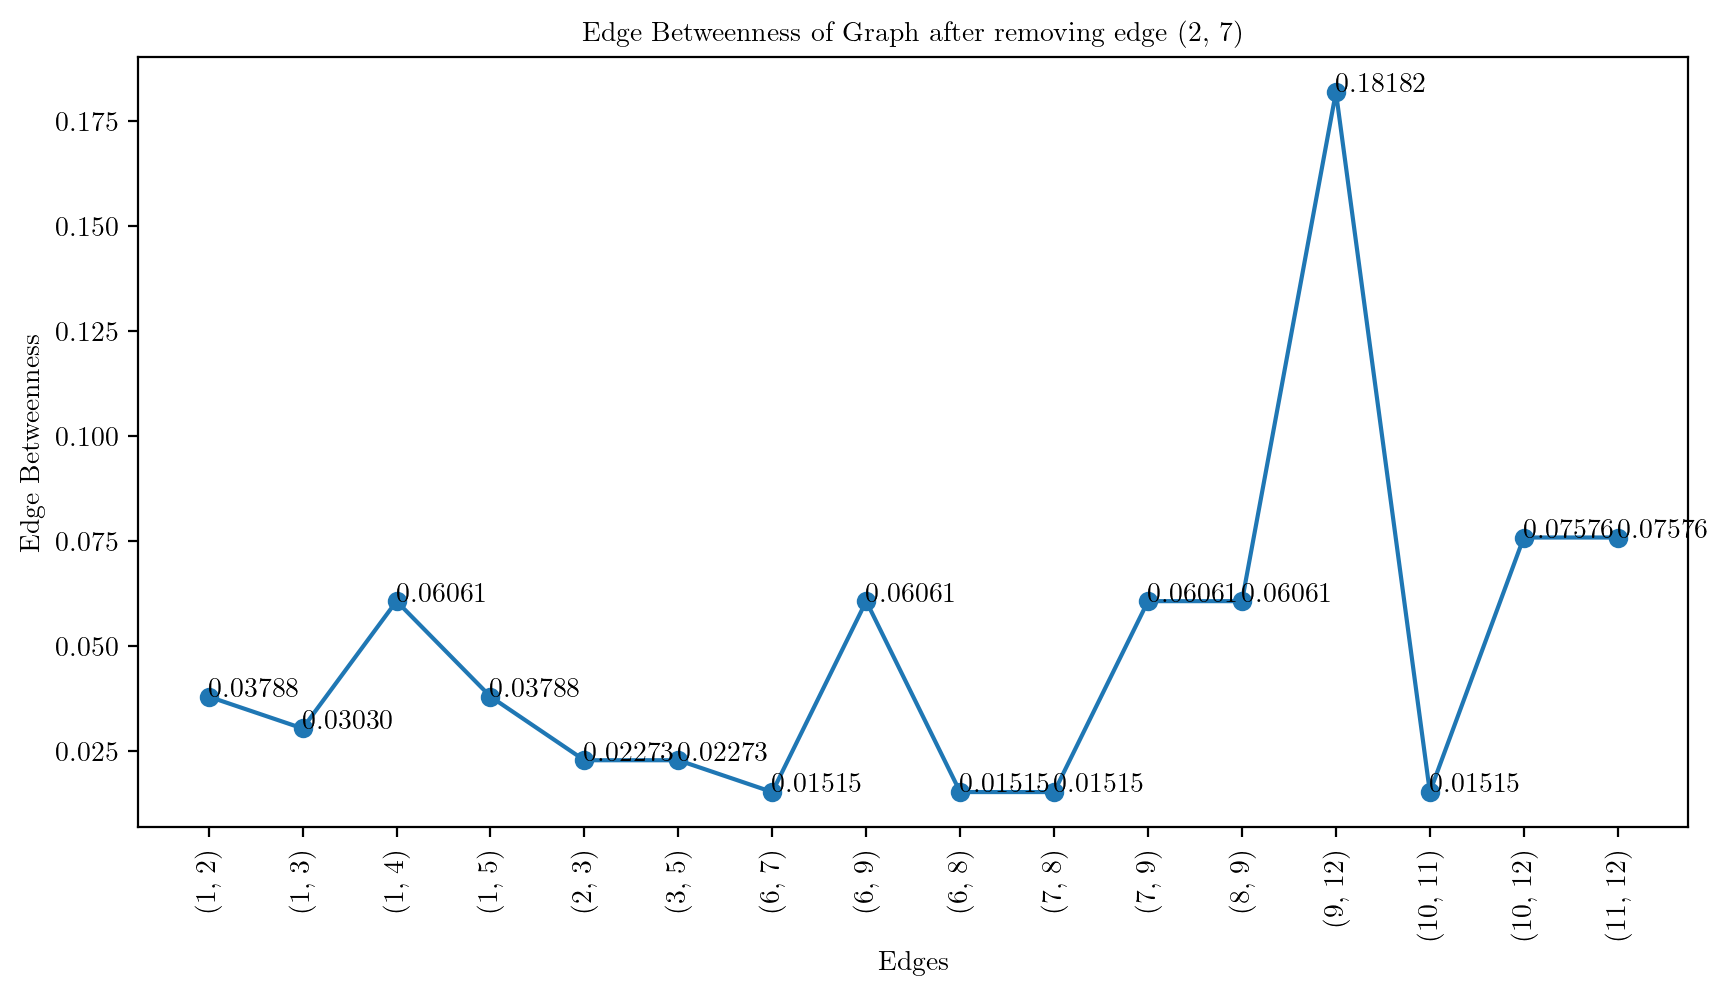

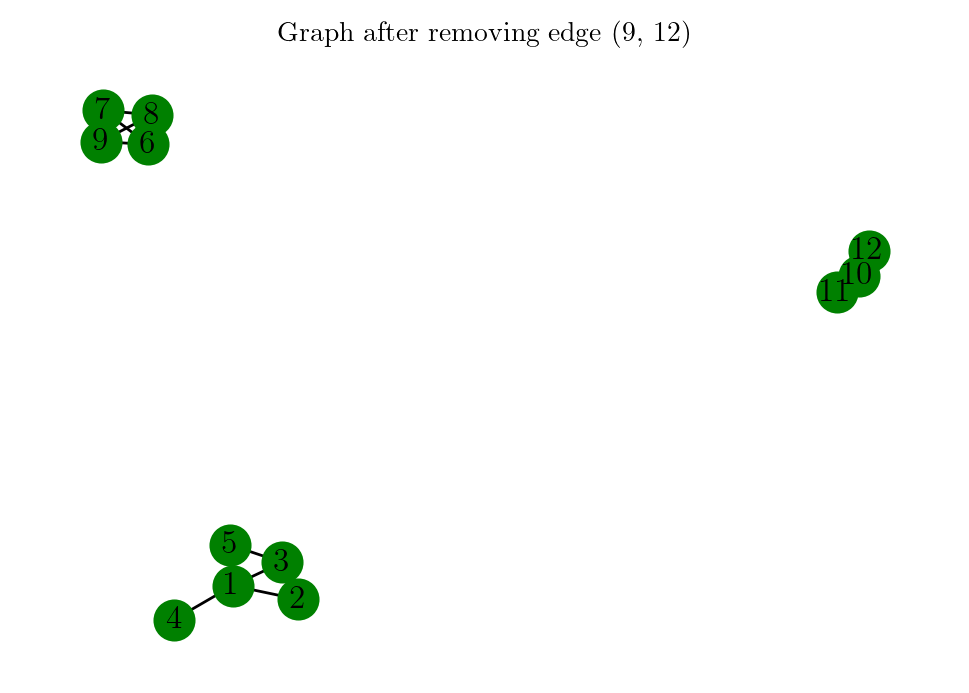

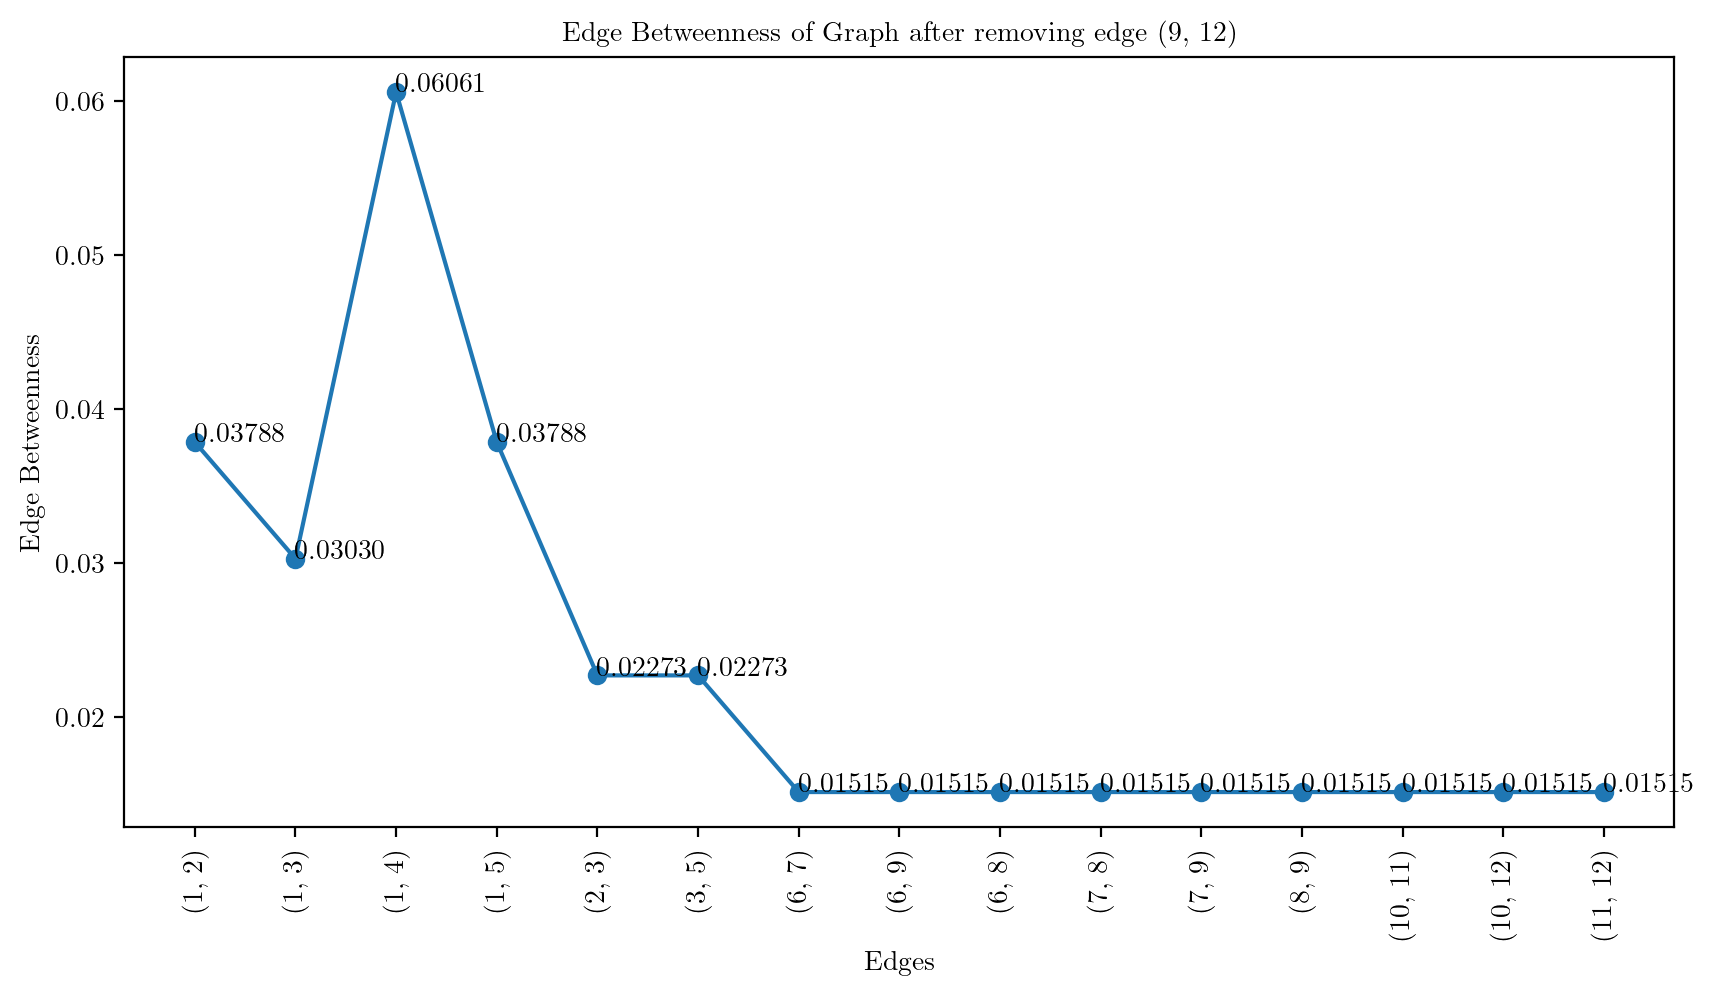

In [106]:
for i in range(2):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(edge_betweenness, key = edge_betweenness.get)
    G.remove_edge(*edge_to_remove)
    plt.figure(figsize = (6, 4))
    plt.title(f"Graph after removing edge {edge_to_remove}")
    nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
    plt.show()
    plotEdgeBetweenness(G, f"Edge Betweenness of Graph after removing edge {edge_to_remove}")

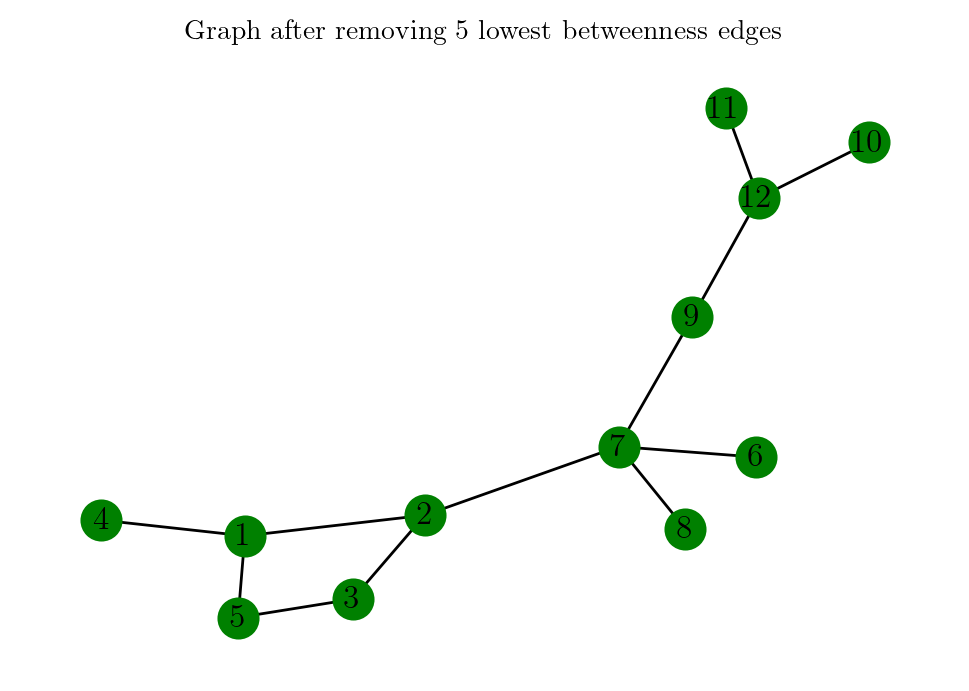

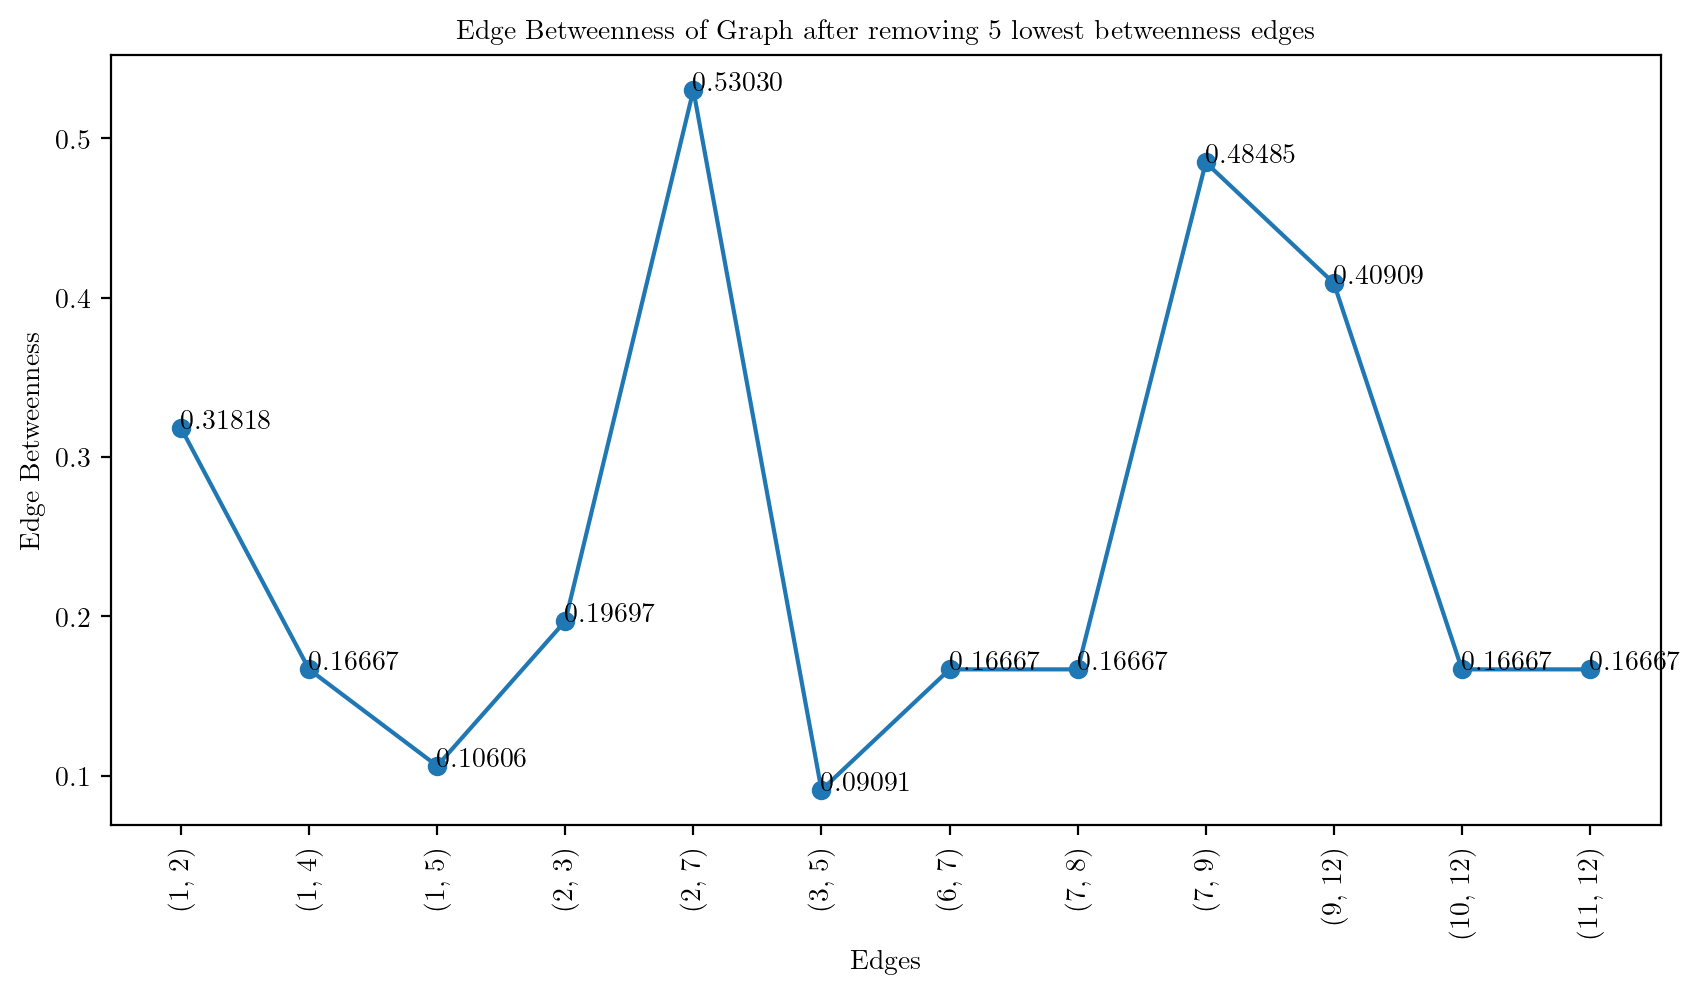

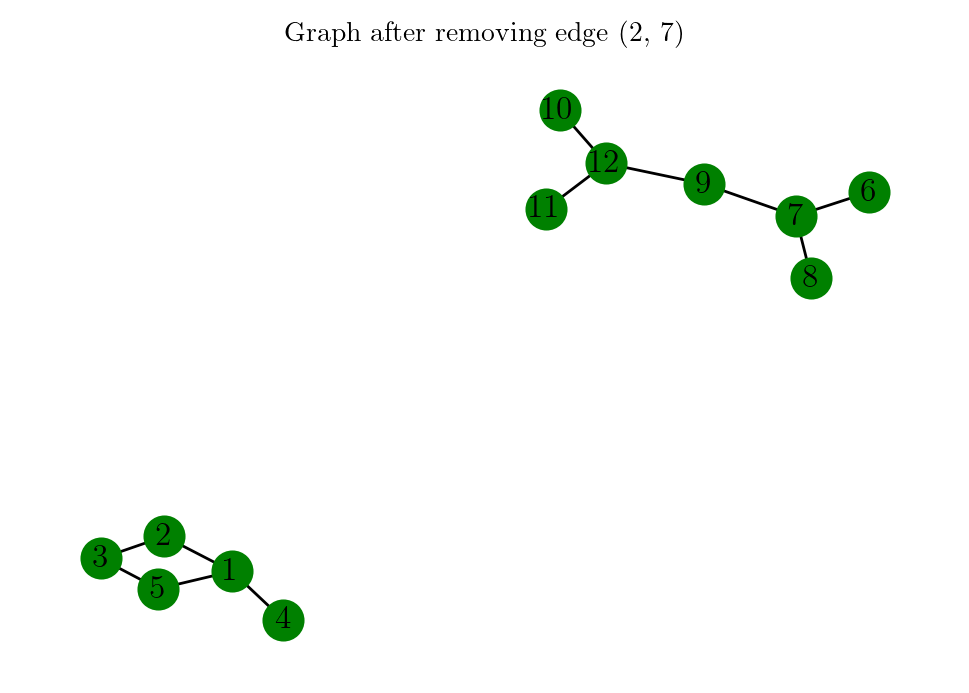

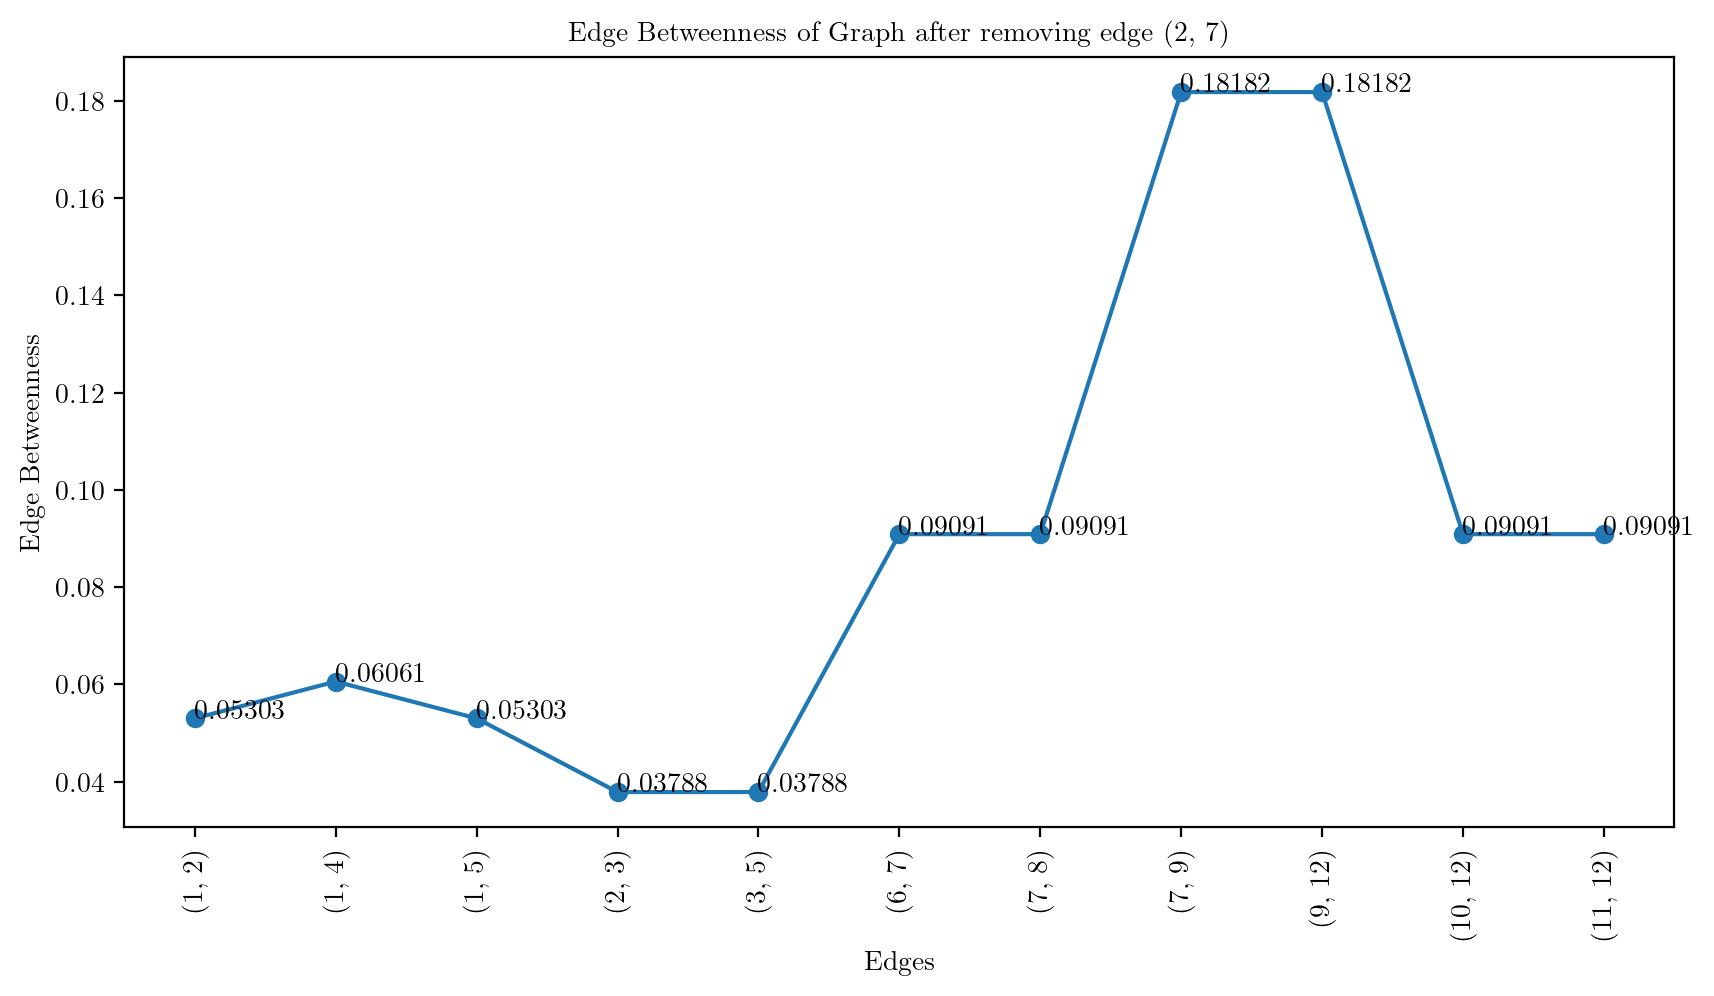

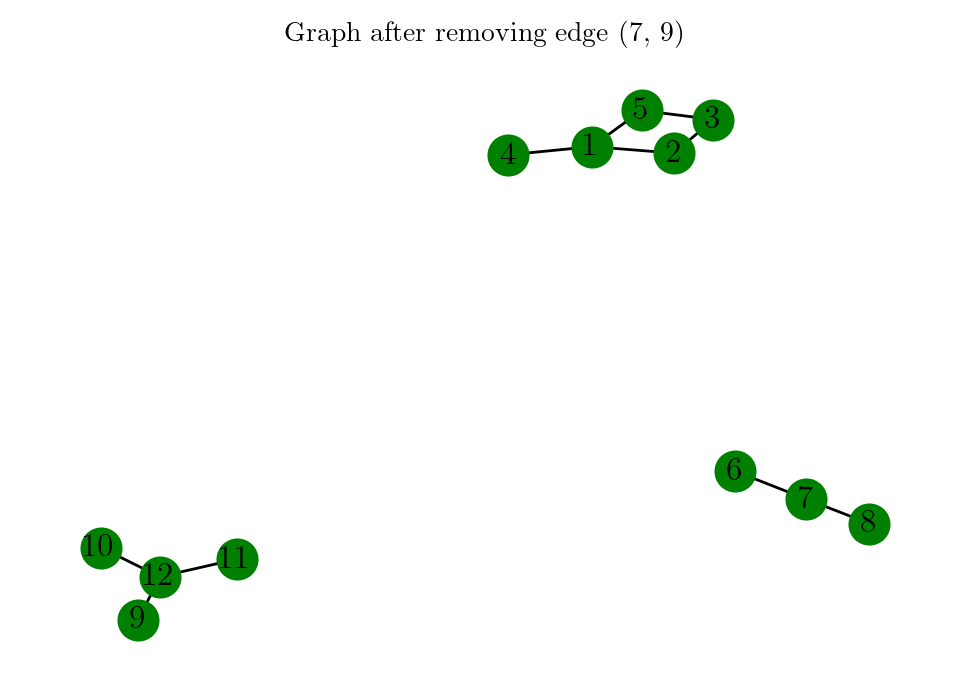

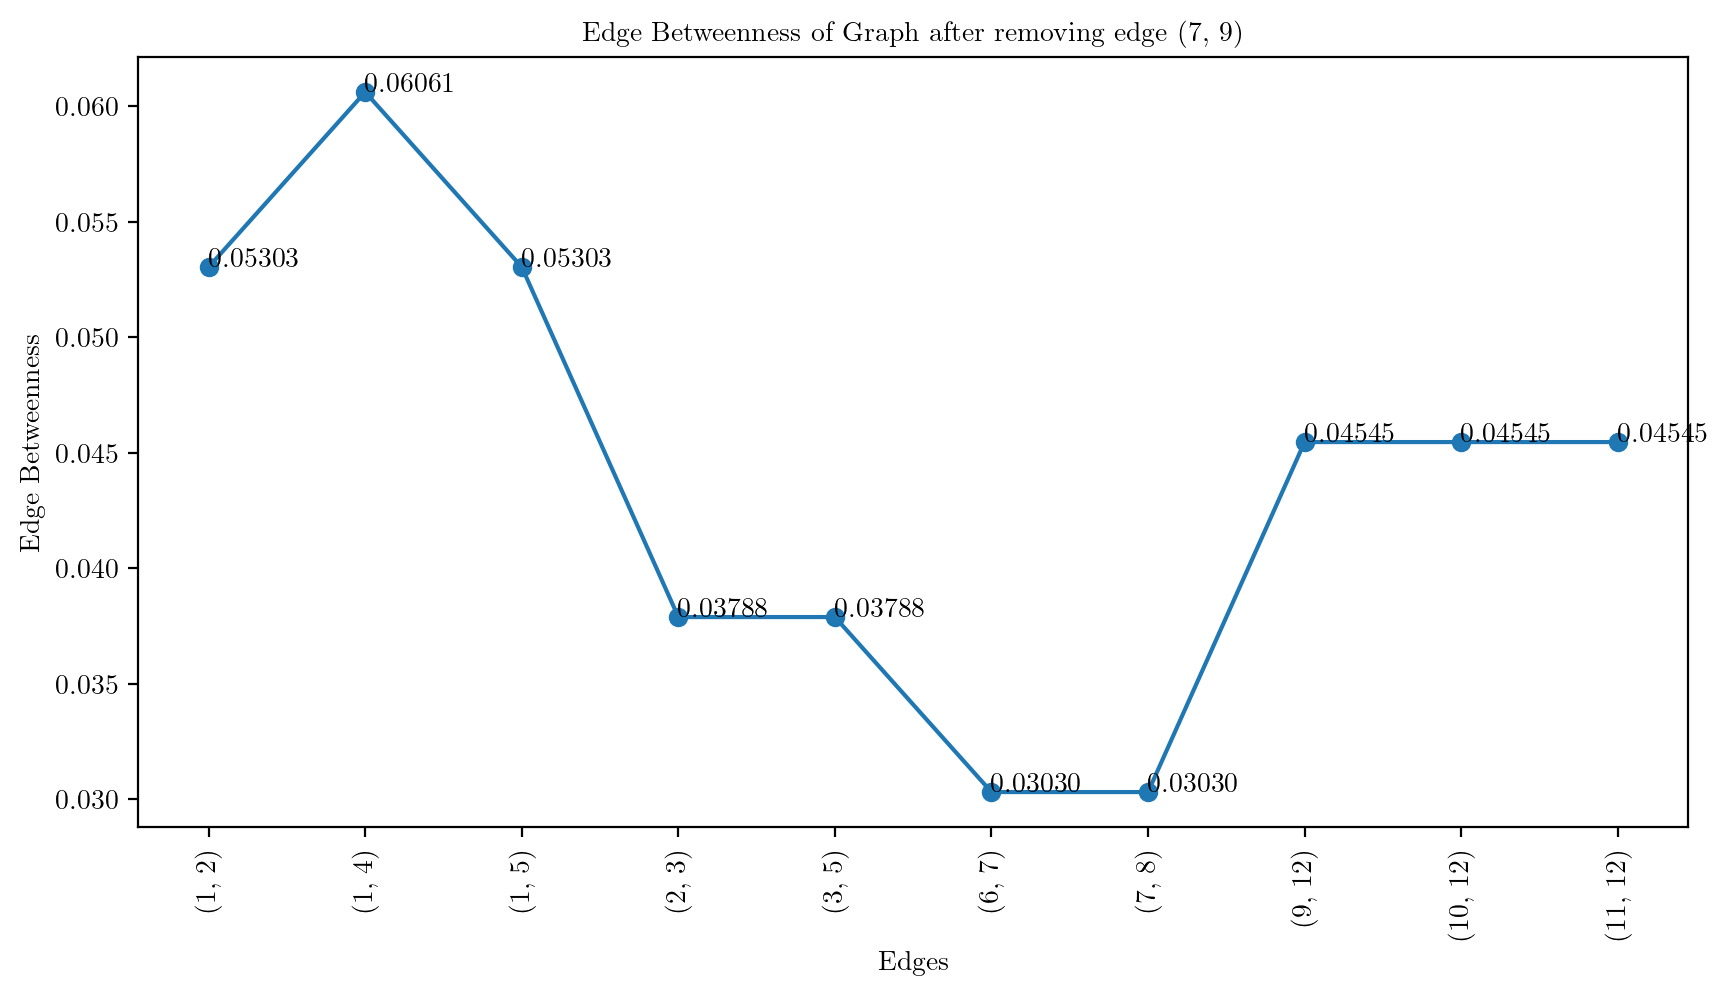

In [107]:
G = nx.Graph()
G.add_edges_from([[1, 2], [2, 3], [1, 3], [1, 4], [1, 5], [3, 5],
                  [6, 7], [7, 8], [8, 9], [6, 9], [6, 8], [7, 9],
                  [10, 11], [11, 12], [10, 12], 
                  [9, 12], [2, 7]])

edge_betweenness = nx.edge_betweenness_centrality(G)
edges_to_remove = sorted(edge_betweenness, key = edge_betweenness.get)[:5]
G.remove_edges_from(edges_to_remove)

plt.figure(figsize = (6, 4))
plt.title("Graph after removing 5 lowest betweenness edges")
nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
plt.show()

plotEdgeBetweenness(G, "Edge Betweenness of Graph after removing 5 lowest betweenness edges")

for i in range(2):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(edge_betweenness, key = edge_betweenness.get)
    G.remove_edge(*edge_to_remove)
    plt.figure(figsize = (6, 4))
    plt.title(f"Graph after removing edge {edge_to_remove}")
    nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
    plt.show()
    plotEdgeBetweenness(G, f"Edge Betweenness of Graph after removing edge {edge_to_remove}")

## **Functions for Extracting Graph and Communities**

In [51]:
def loadGraph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            if line.startswith("#"):
                continue
            u, v = map(int, line.strip().split("\t"))
            G.add_edge(u, v)
    return G

def loadCommunity(path, k = None):
    community = {}
    node = set()
    with open(path) as f:
        for id, nodes in enumerate(f):
            if (k is not None) and (id >= k):
                break
            community[id] = list(map(int, nodes.strip().split("\t"))) 
            node.update(set(community[id]))
    return community, node

def inducedSubgraph(G, nodes):
    H = G.subgraph(nodes)
    return H
    

# **DBLP**

In [52]:
G_DBLP = loadGraph("./Networks/DBLP/com-dblp.ungraph.txt")
communitiesDBLP, nodes = loadCommunity("./Networks/DBLP/com-dblp.top5000.cmty.txt", k = 150)
G_ind_DBLP = inducedSubgraph(G_DBLP, nodes)

print("Number of nodes: ", G_DBLP.number_of_nodes())
print("Number of edges: ", G_DBLP.number_of_edges())
print("Number of communities: ", len(communitiesDBLP))
print("Number of nodes in induced subgraph: ", G_ind_DBLP.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_DBLP.number_of_edges())

Number of nodes:  317080
Number of edges:  1049866
Number of communities:  150
Number of nodes in induced subgraph:  1420
Number of edges in induced subgraph:  4609


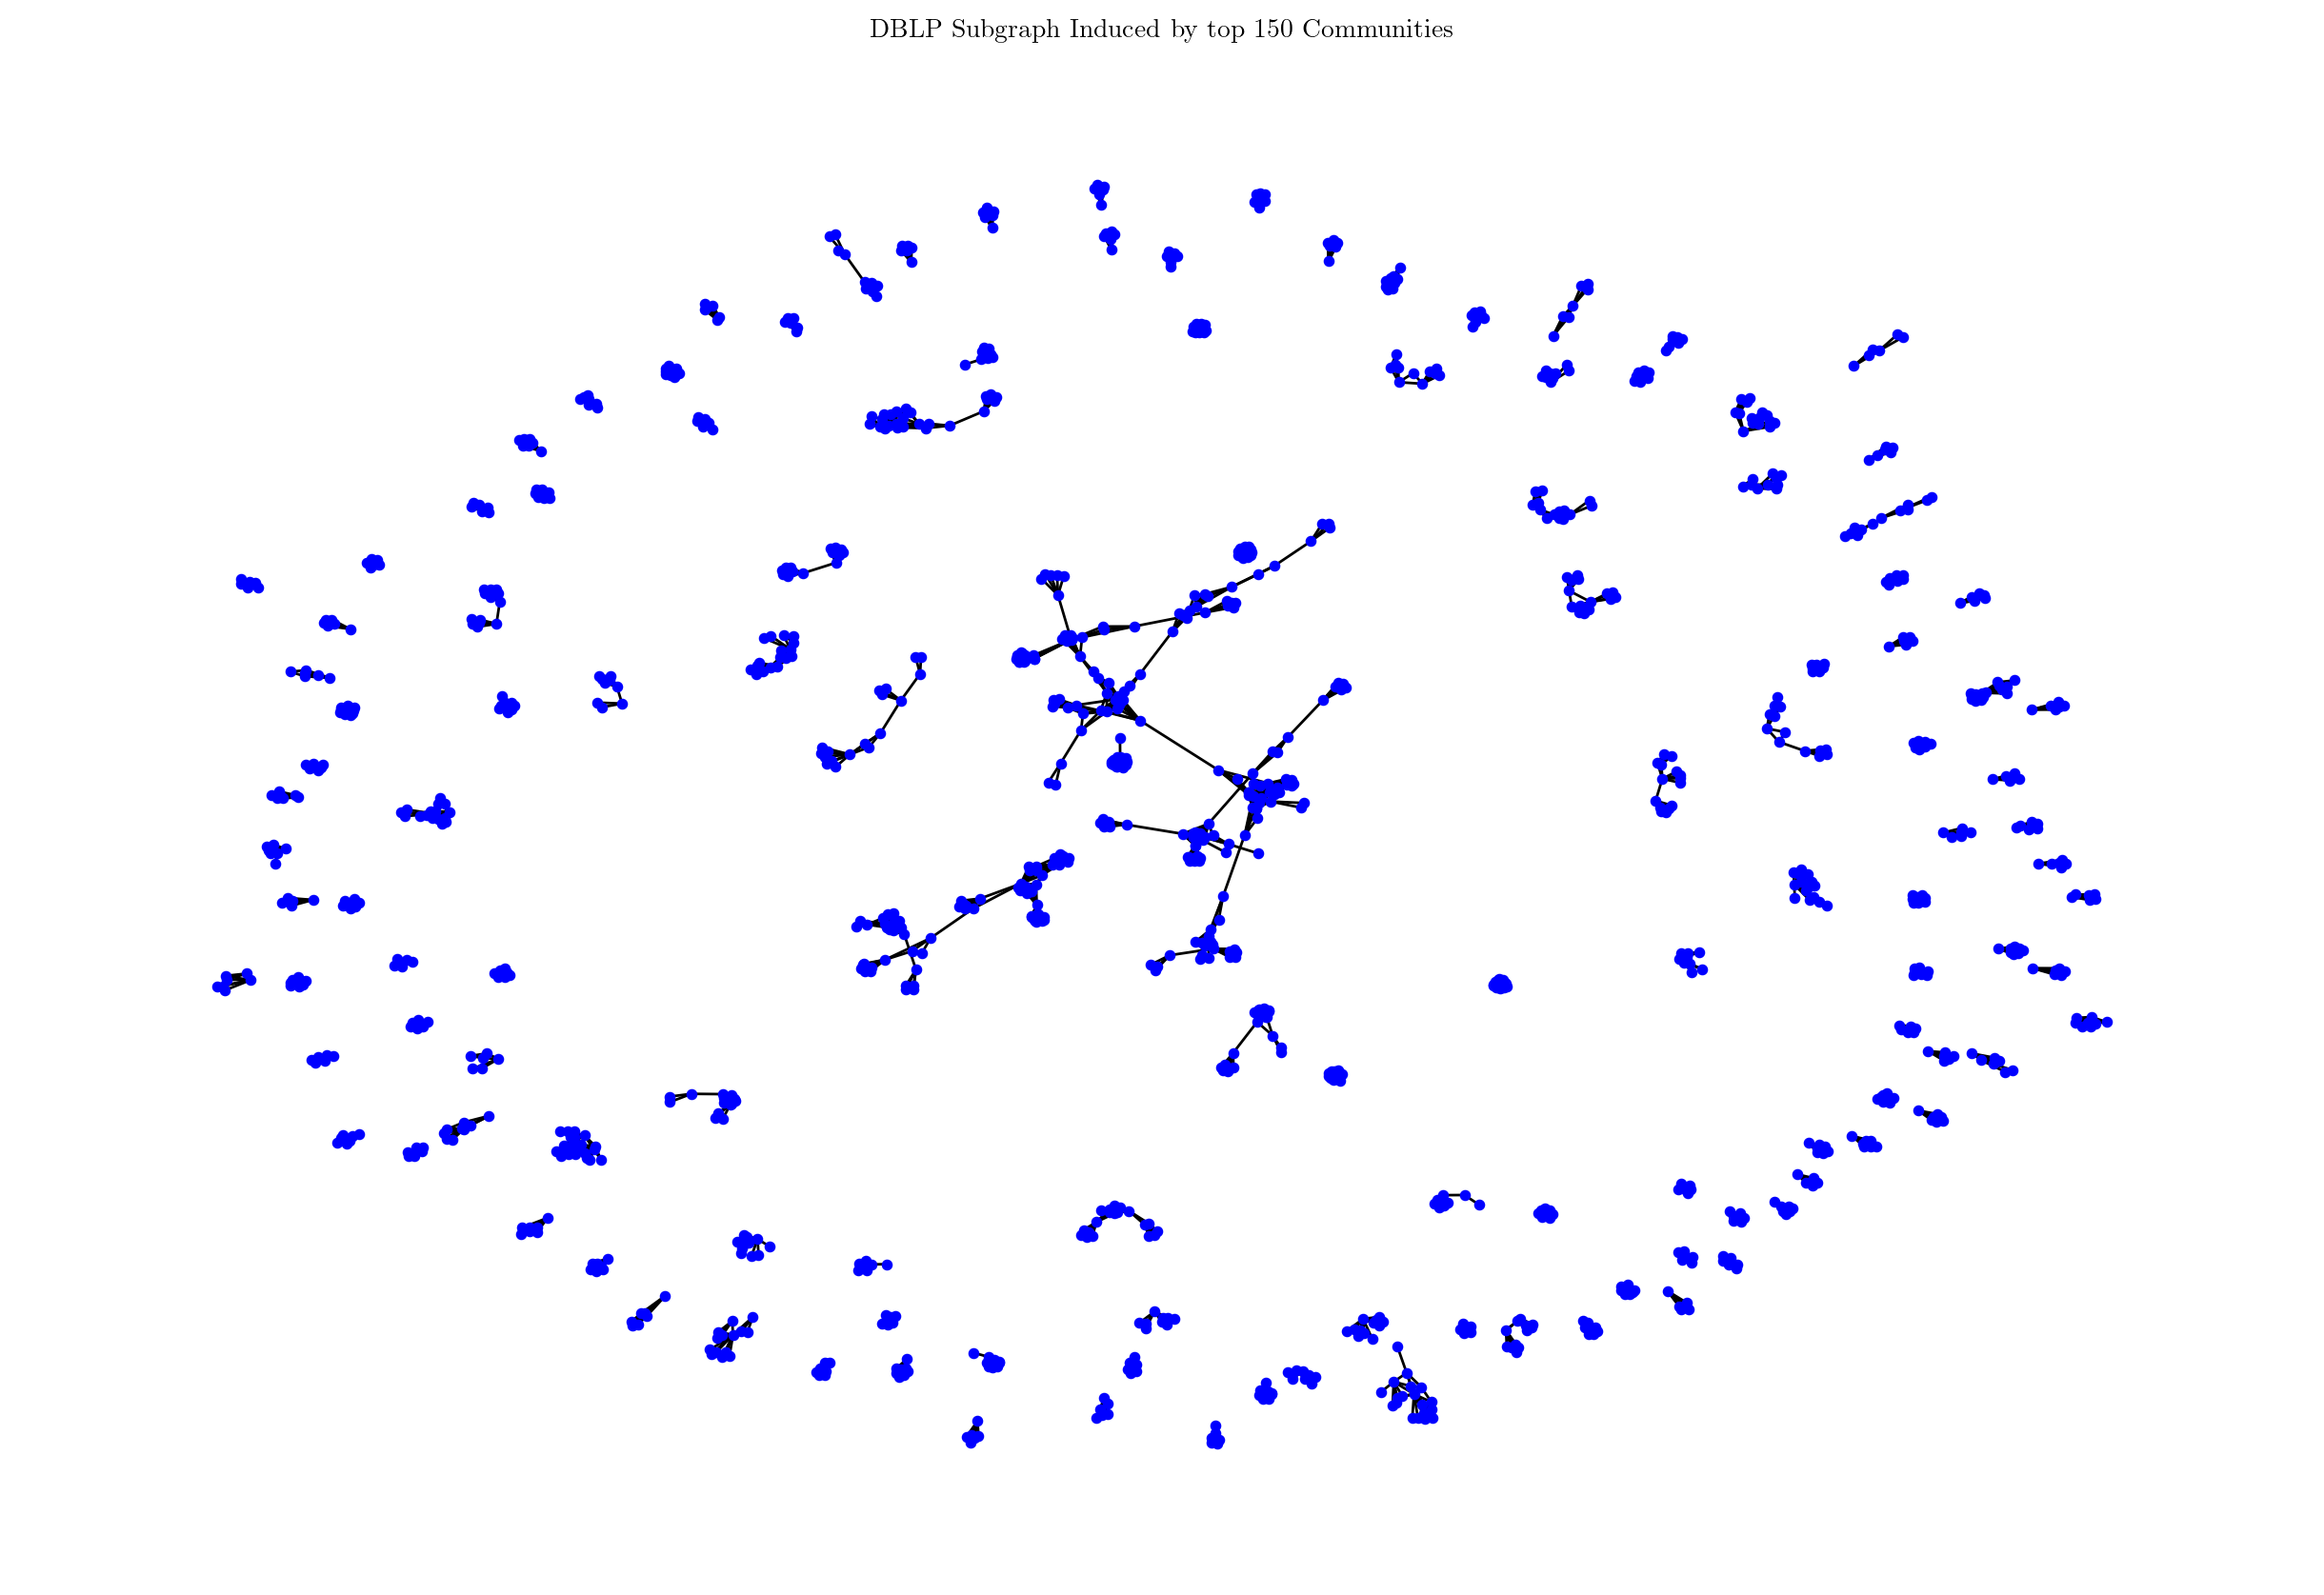

In [53]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_DBLP, with_labels = False, node_size = 10, node_color = "blue", edge_color = "black", pos = nx.spring_layout(G_ind_DBLP, scale = 4))
plt.title("DBLP Subgraph Induced by top 150 Communities")
plt.show()

# **Amazon Co-Purchase**

In [54]:
G_Amz = loadGraph("./Networks/AmazonCoPurchase/com-amazon.ungraph.txt")
communitiesAmazon, nodes = loadCommunity("./Networks/AmazonCoPurchase/com-amazon.top5000.cmty.txt", k = 300)
G_ind_Amz = inducedSubgraph(G_Amz, nodes)

print("Number of nodes: ", G_Amz.number_of_nodes())
print("Number of edges: ", G_Amz.number_of_edges())
print("Number of communities: ", len(communitiesAmazon))
print("Number of nodes in induced subgraph: ", G_ind_Amz.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_Amz.number_of_edges())

Number of nodes:  334863
Number of edges:  925872
Number of communities:  300
Number of nodes in induced subgraph:  2008
Number of edges in induced subgraph:  5960


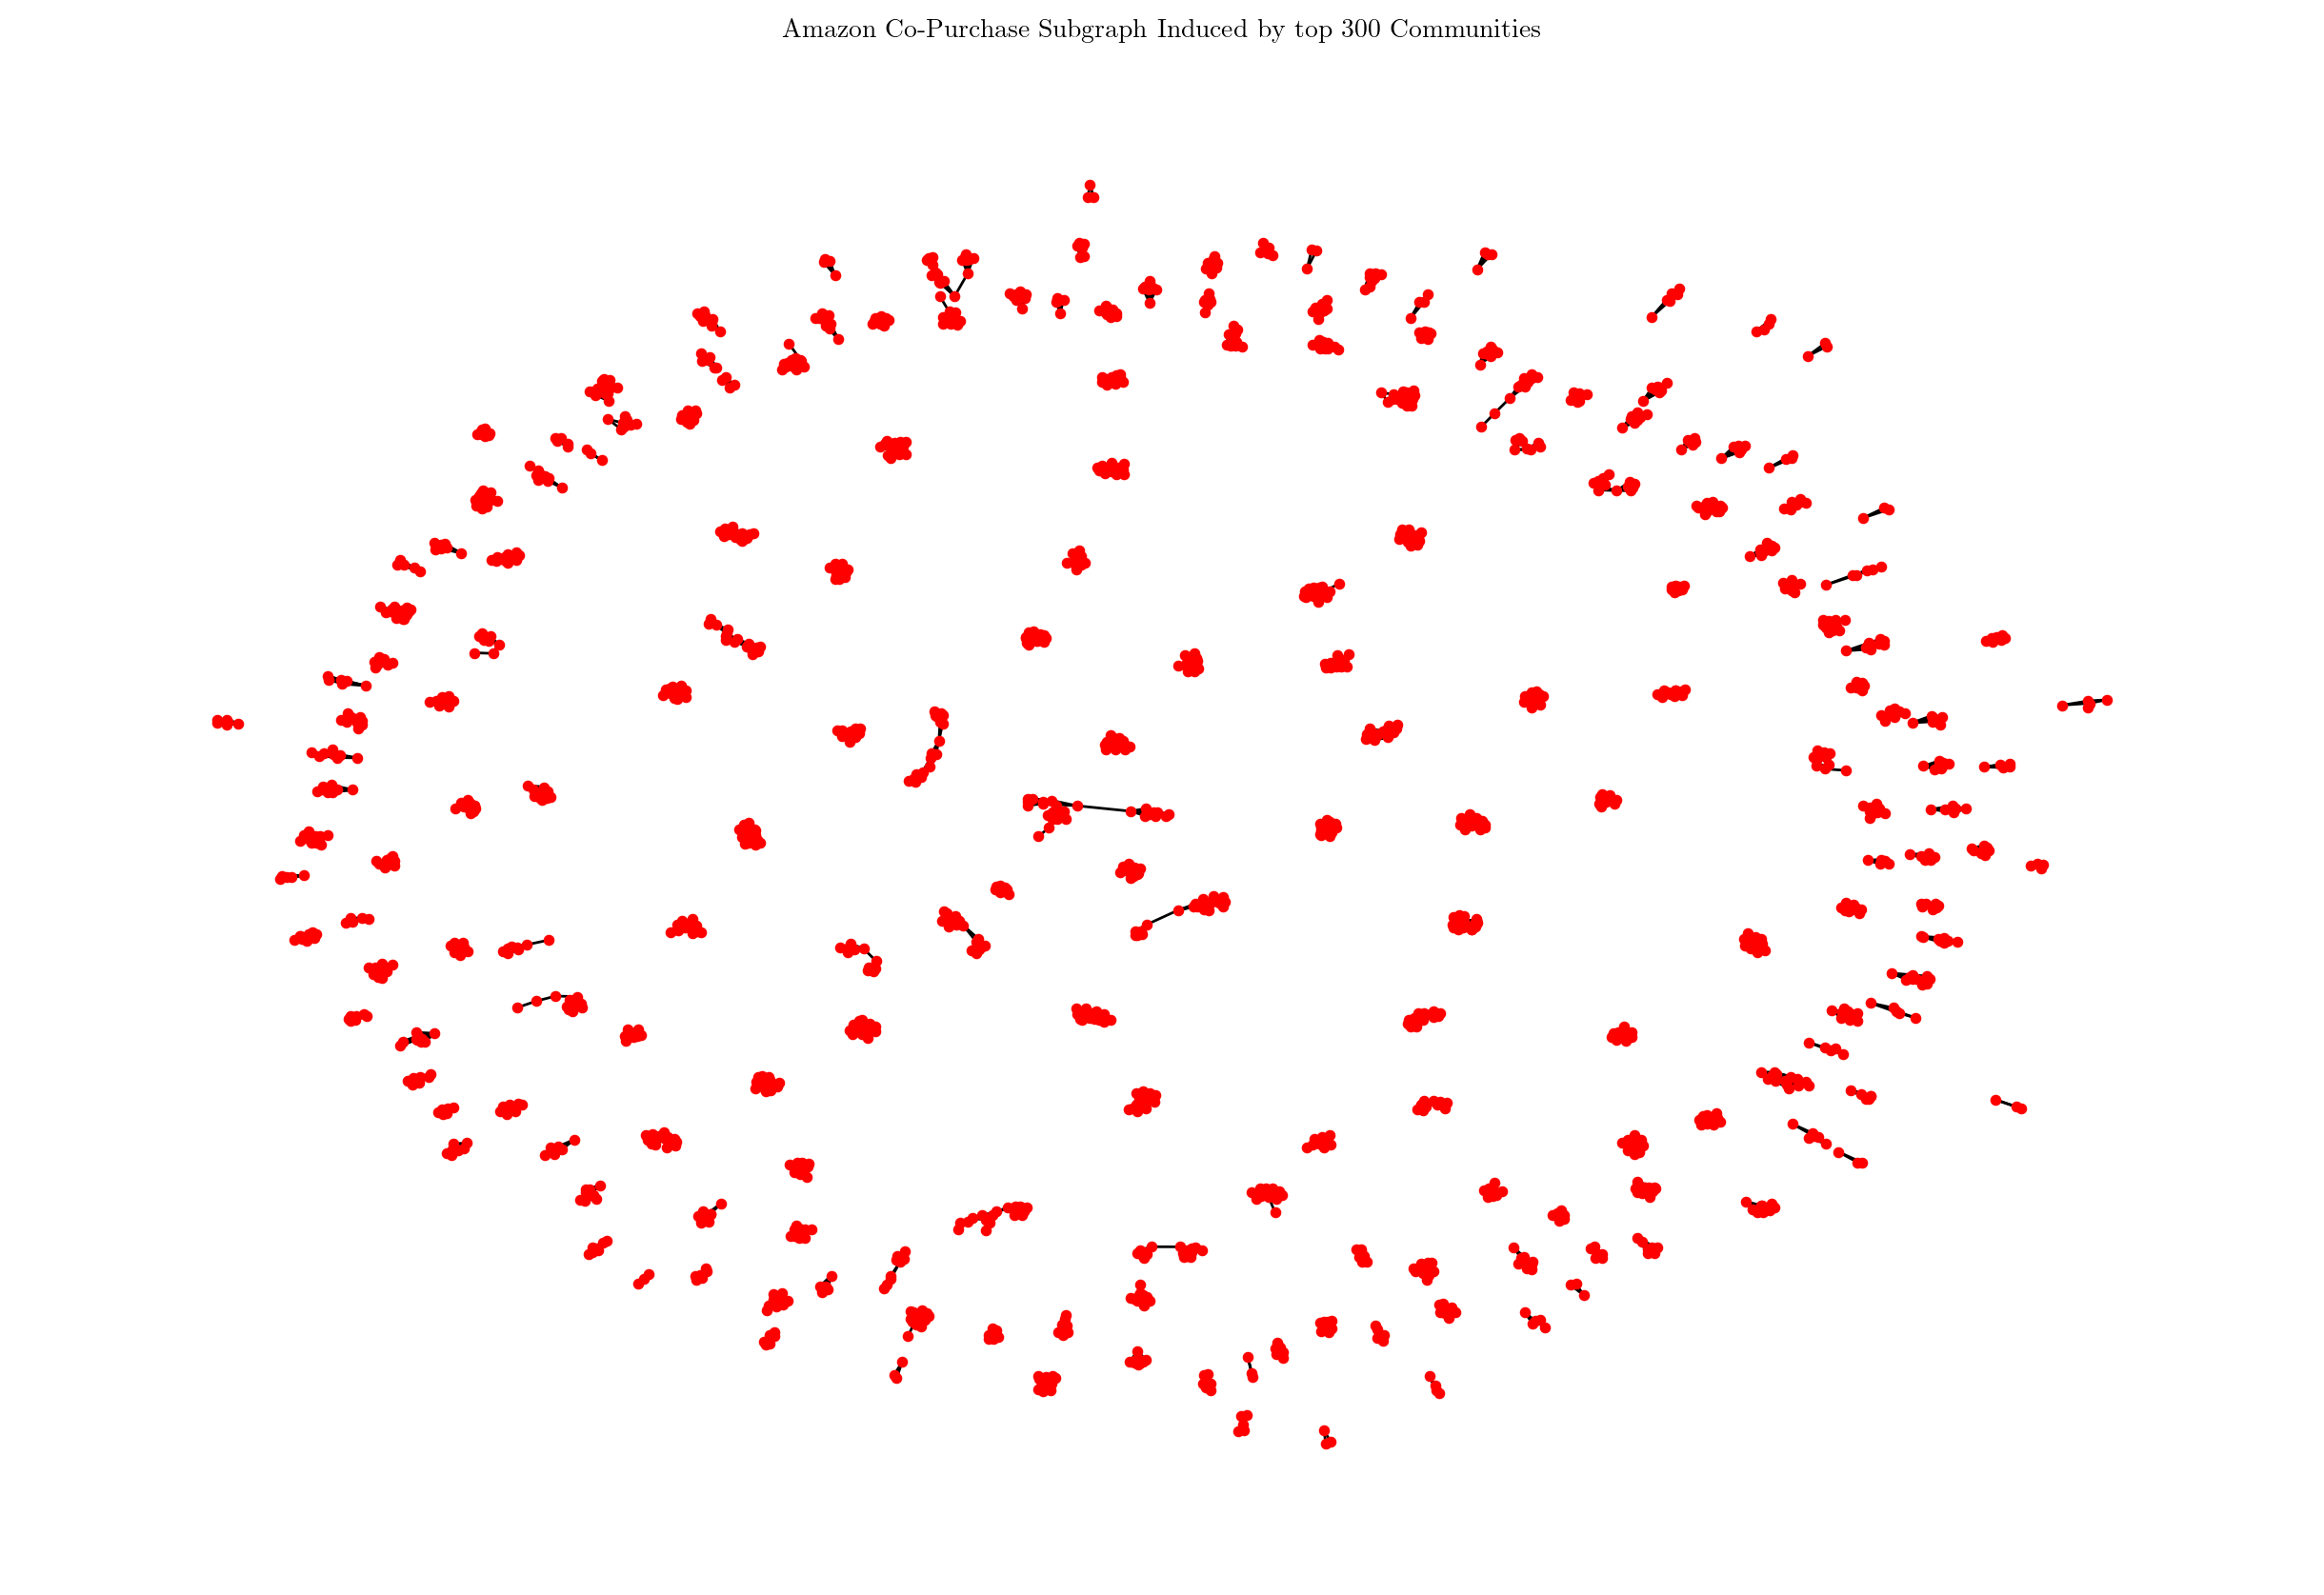

In [55]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_Amz, with_labels = False, node_size = 10, node_color = "red", edge_color = "black", pos = nx.spring_layout(G_ind_Amz, scale = 4))
plt.title("Amazon Co-Purchase Subgraph Induced by top 300 Communities")
plt.show()

# **YouTube**

In [56]:
G_YT = loadGraph("./Networks/YouTube/com-youtube.ungraph.txt")
communitiesYT, nodes = loadCommunity("./Networks/YouTube/com-youtube.top5000.cmty.txt", k = 100)
G_ind_YT = inducedSubgraph(G_YT, nodes)

print("Number of nodes: ", G_YT.number_of_nodes())
print("Number of edges: ", G_YT.number_of_edges())
print("Number of communities: ", len(communitiesYT))
print("Number of nodes in induced subgraph: ", G_ind_YT.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_YT.number_of_edges())

Number of nodes:  1134890
Number of edges:  2987624
Number of communities:  100
Number of nodes in induced subgraph:  4890
Number of edges in induced subgraph:  20787


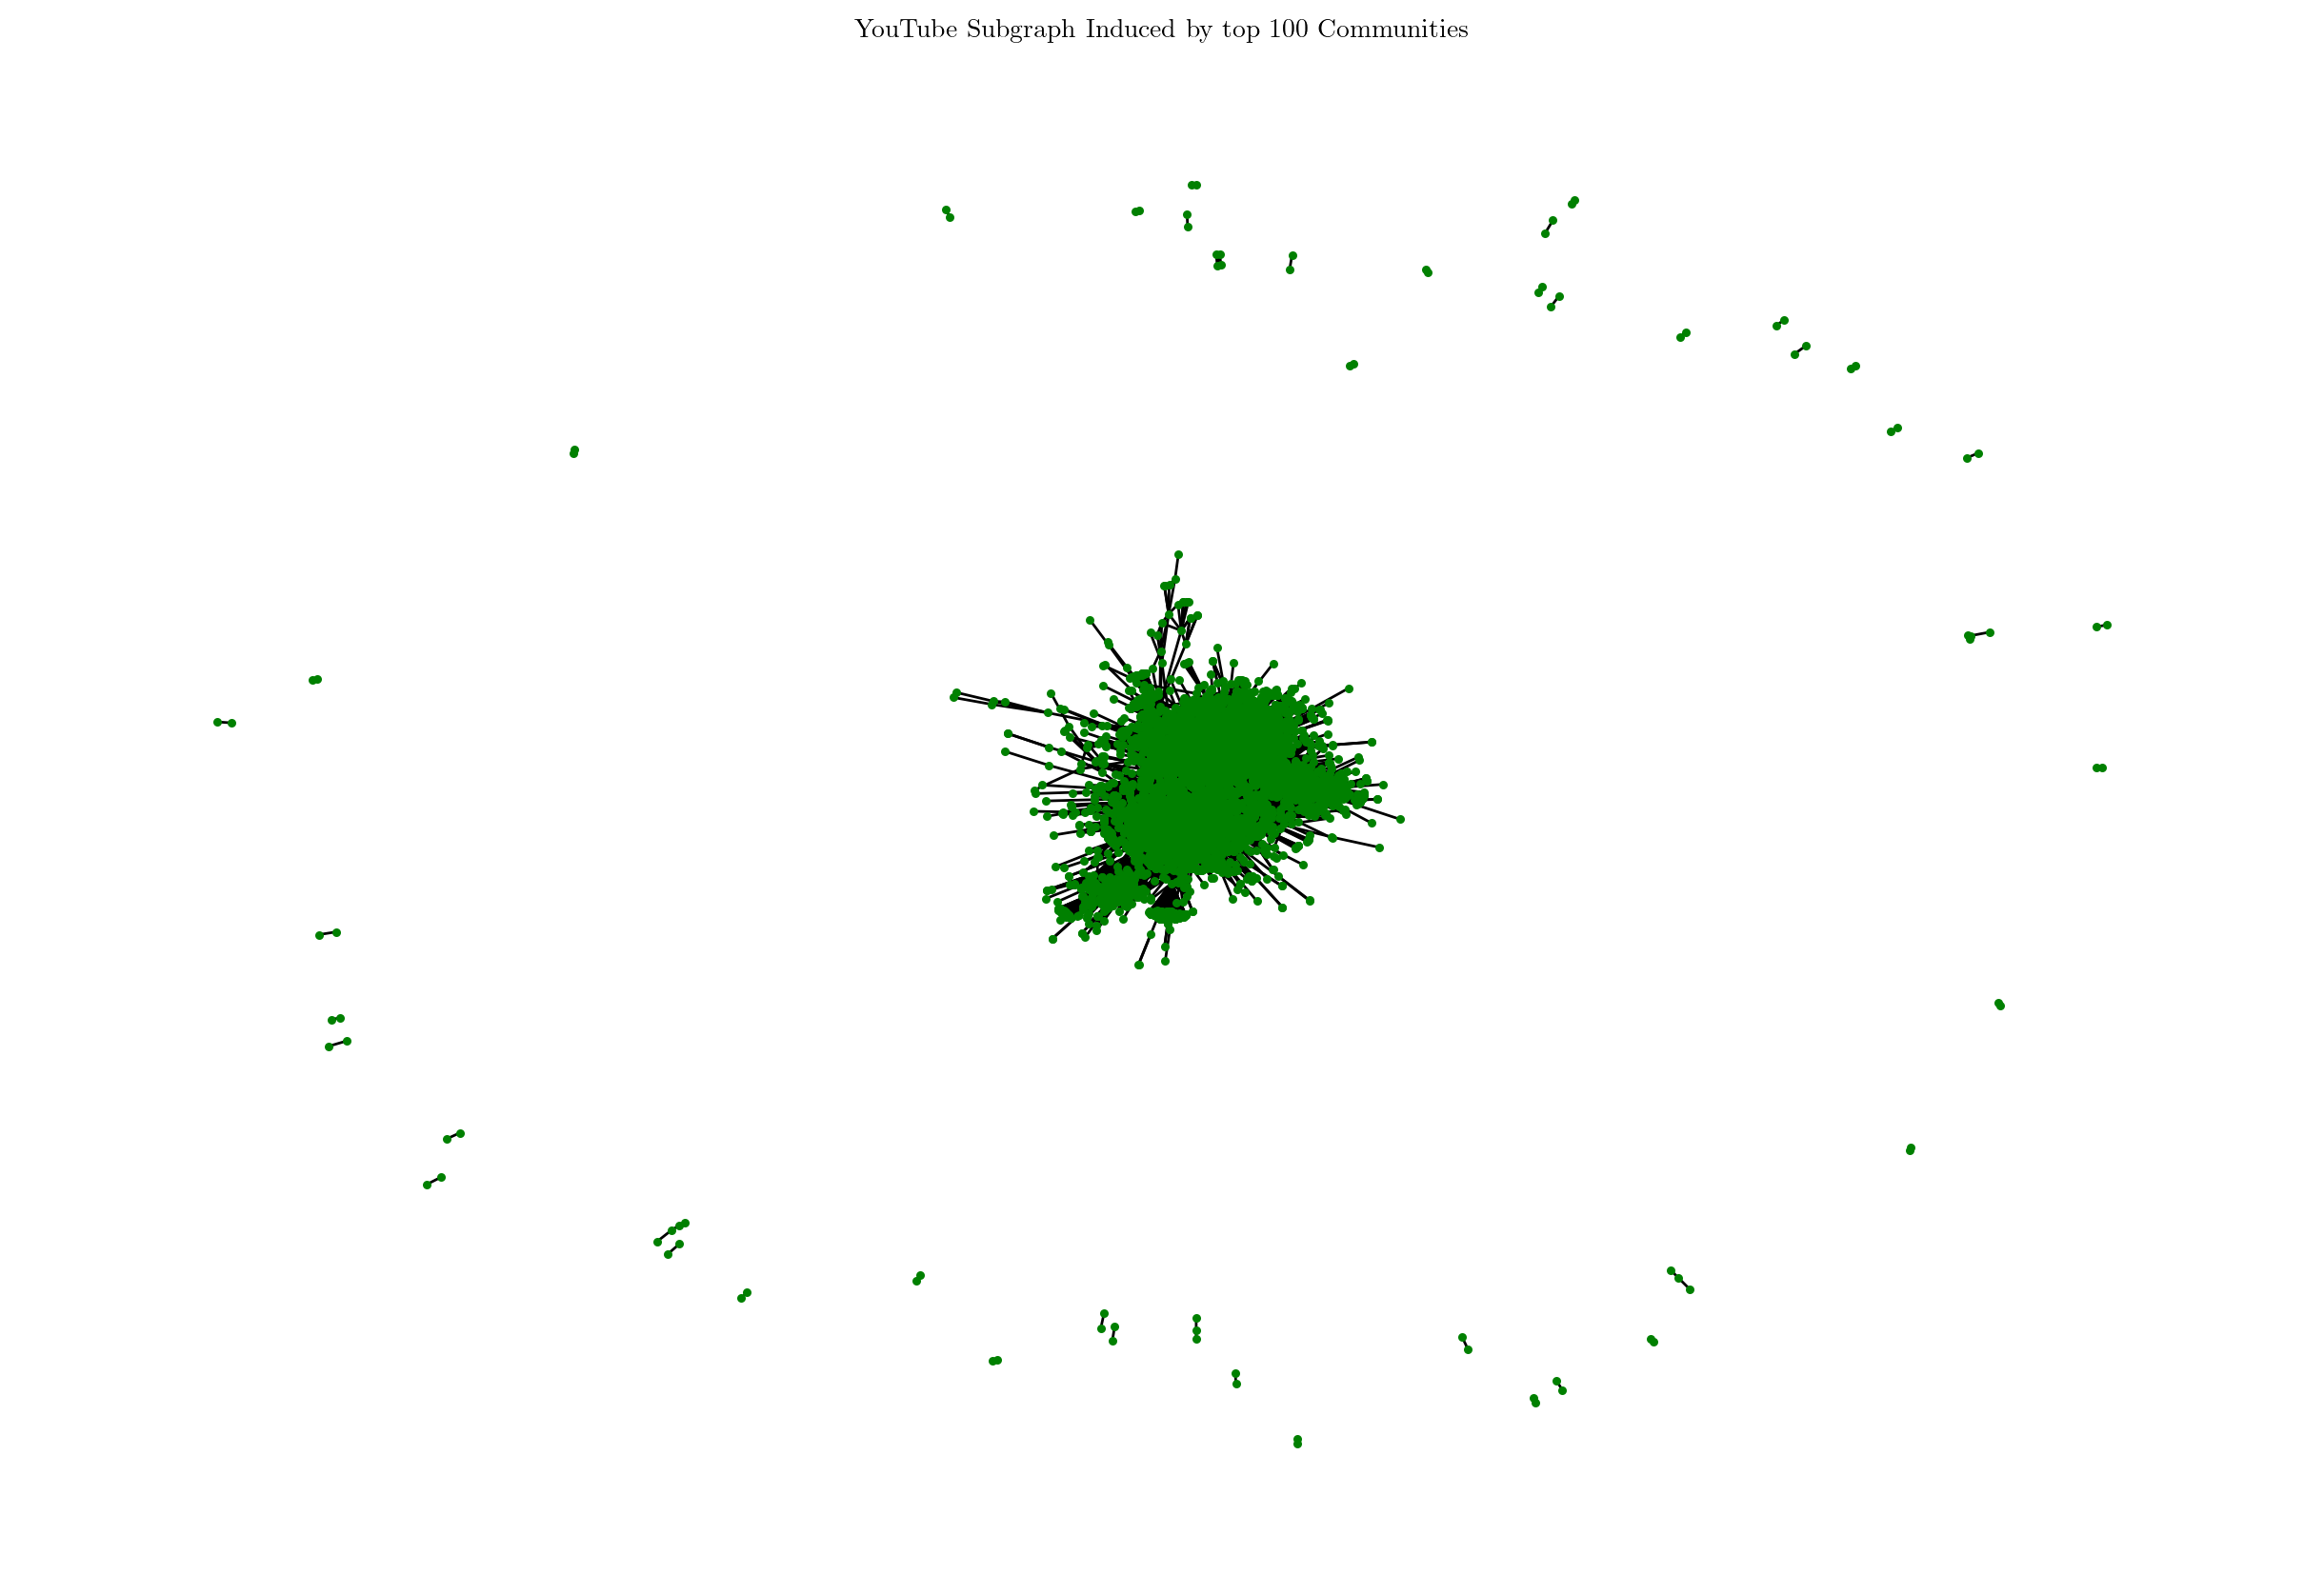

In [57]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_YT, with_labels = False, node_size = 5, node_color = "green", edge_color = "black", pos = nx.spring_layout(G_ind_YT, scale = 4))
plt.title("YouTube Subgraph Induced by top 100 Communities")
plt.show()

# **Email-Eu-Core Network**

In [58]:
from collections import defaultdict
def loadEUCommunity(path):
    community = defaultdict(list)
    with open(path) as f:
         for line in f:
            node, comm_id = map(int, line.strip().split())
            community[comm_id].append(node)
    return community

def loadEUGraph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            u, v = map(int, line.strip().split())
            if (v != u):
                G.add_edge(u, v)
            else:
                G.add_node(u)
    return G

In [59]:
G_eu = loadEUGraph("./Networks/EmailEUCore/email-Eu-core.txt")
comm_eu = loadEUCommunity("./Networks/EmailEUCore/email-Eu-core-department-labels.txt")

print("Number of nodes: ", G_eu.number_of_nodes())
print("Number of edges: ", G_eu.number_of_edges())
print("Number of communities: ", len(comm_eu))

Number of nodes:  1005
Number of edges:  16064
Number of communities:  42


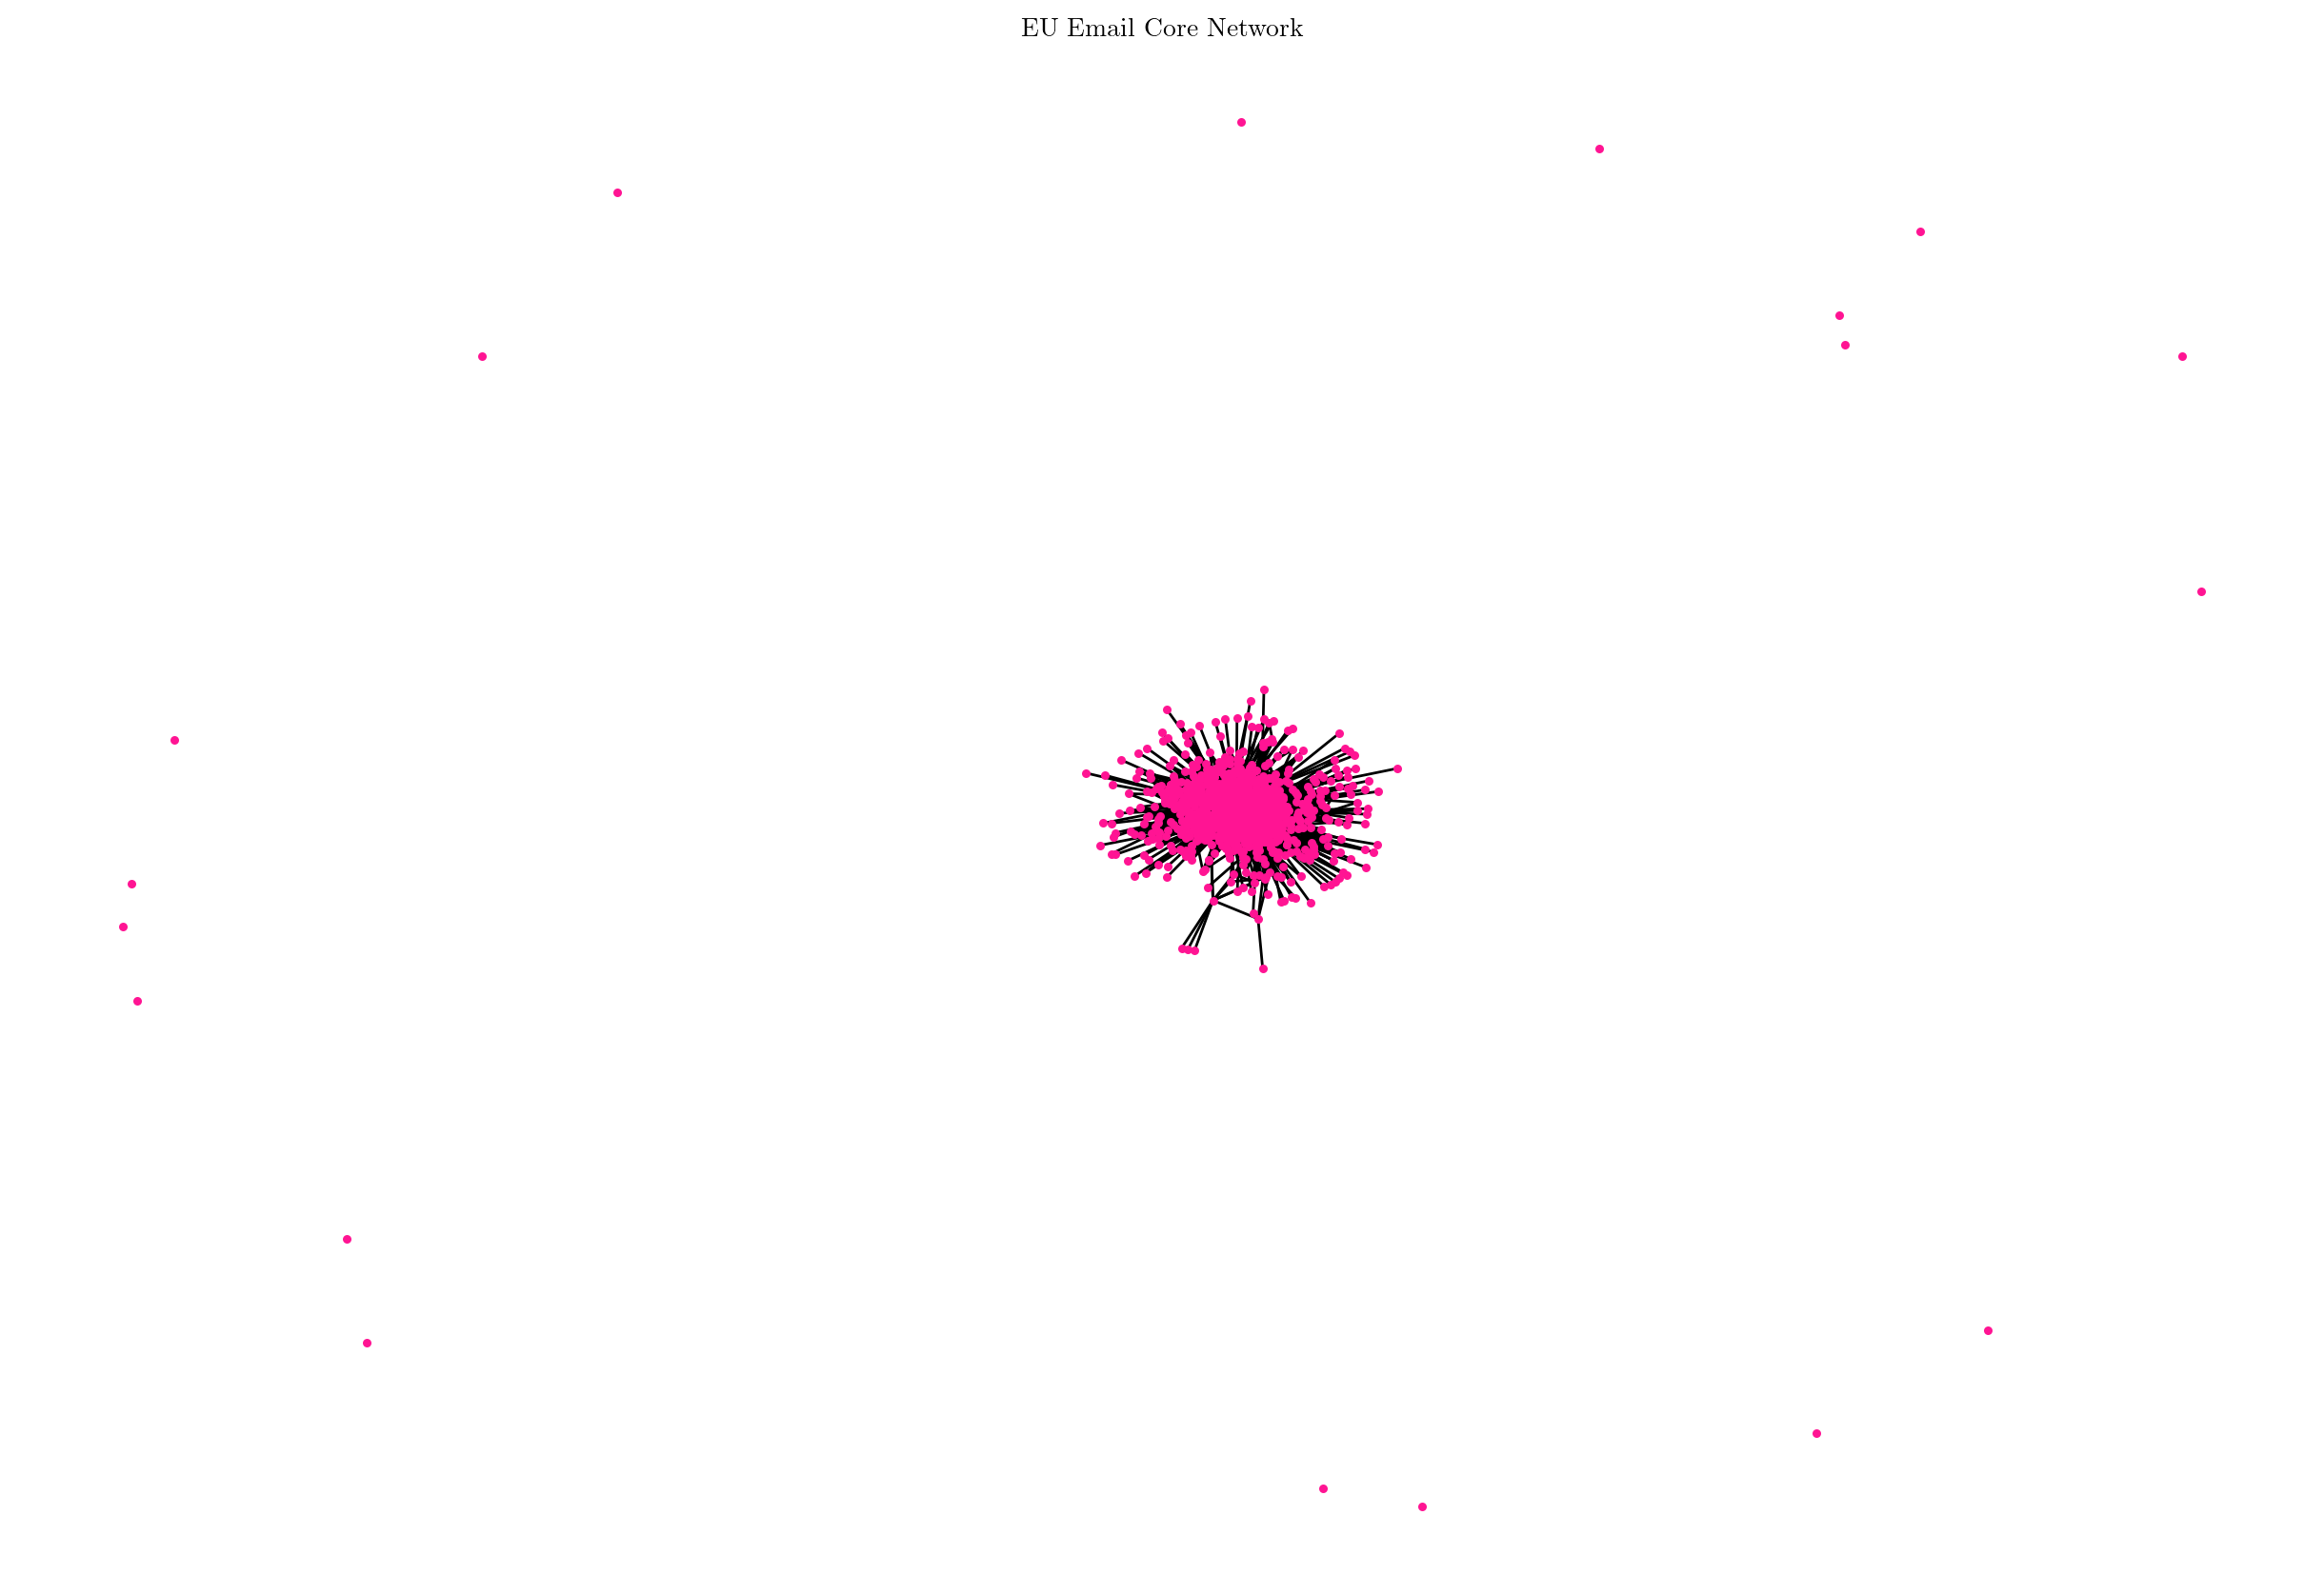

In [60]:
plt.figure(figsize = (12, 8))
nx.draw(G_eu, with_labels = False, node_size = 5, node_color = "deeppink", edge_color = "black", pos = nx.spring_layout(G_eu, scale = 4))
plt.title("EU Email Core Network")
plt.show()

# **Facebook**

In [61]:
G_FB = loadEUGraph("./Networks/FacebookCircles/facebook_combined.txt")

print("Number of nodes: ", G_FB.number_of_nodes())
print("Number of edges: ", G_FB.number_of_edges())

Number of nodes:  4039
Number of edges:  88234


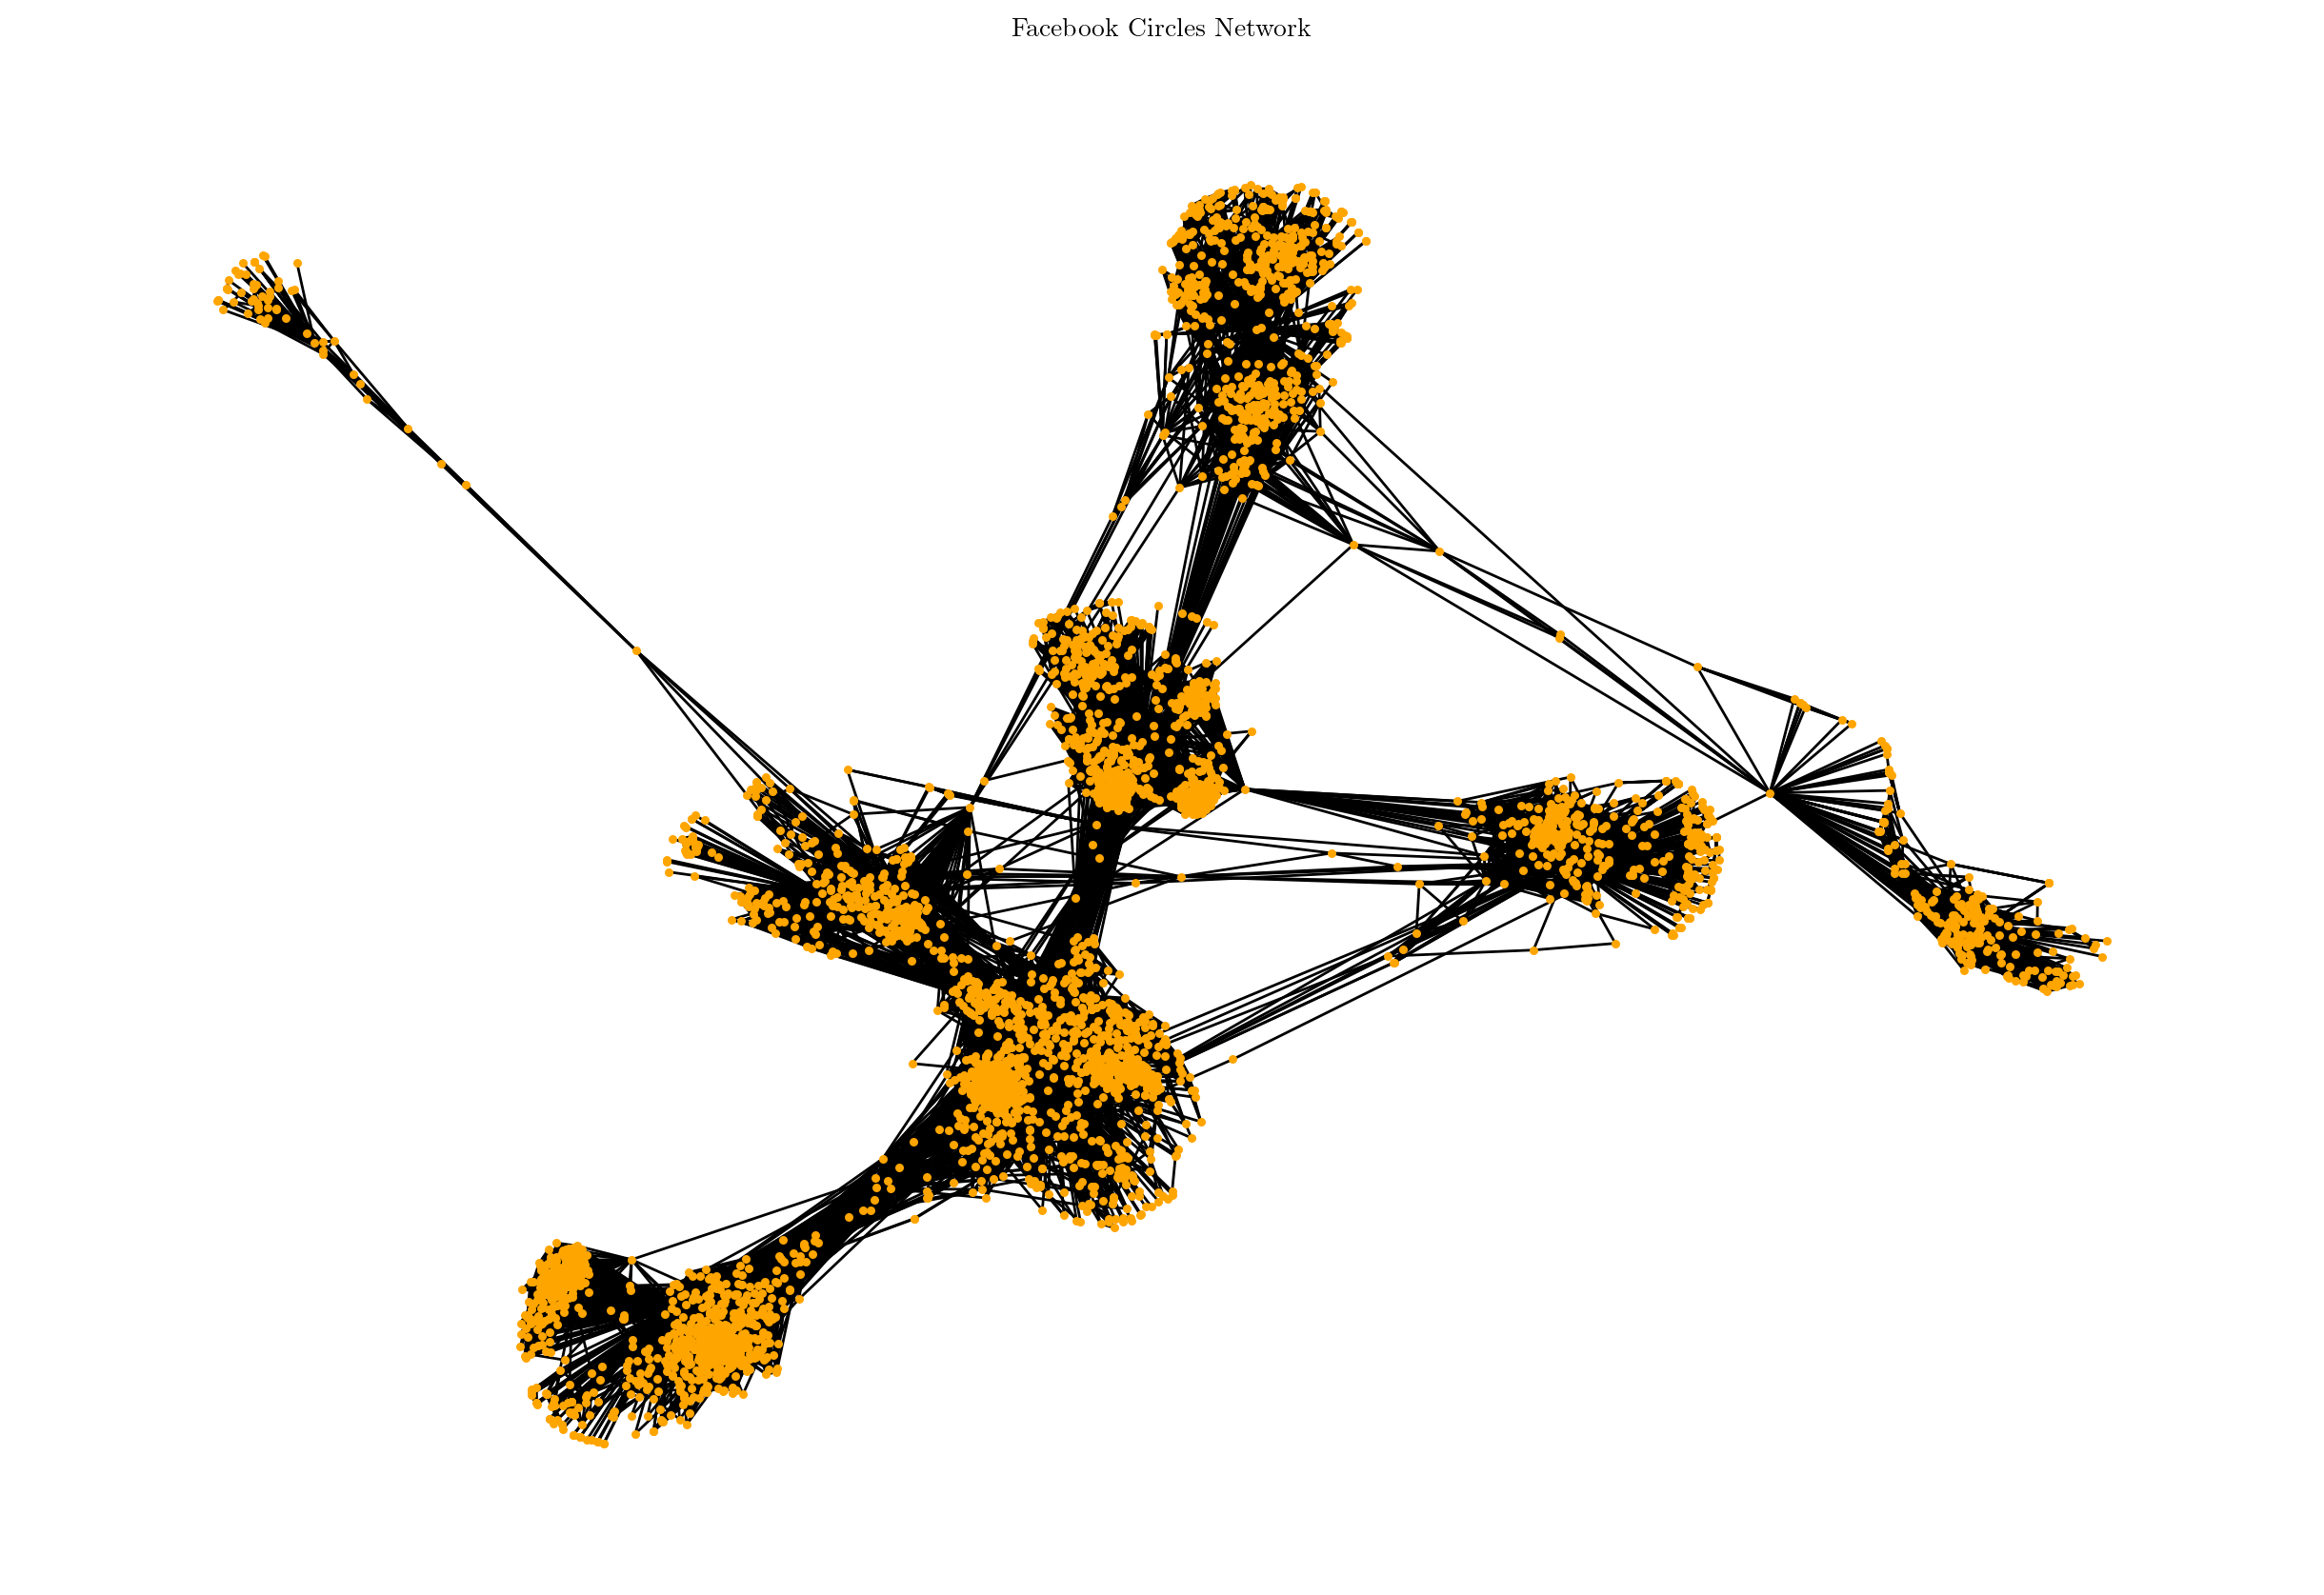

In [62]:
plt.figure(figsize = (12, 8))
nx.draw(G_FB, with_labels = False, node_size = 5, node_color = "orange", edge_color = "black", pos = nx.spring_layout(G_FB, scale = 4))
plt.title("Facebook Circles Network")
plt.show()

In [63]:
def plotRandomCommunity(G, community, title = None):
    id = np.random.randint(len(community))
    H = G.subgraph(community[id])
    plt.figure(figsize = (12, 8))
    nx.draw(H, with_labels = False, node_size = 50, node_color = "darkblue", edge_color = "black", pos = nx.spring_layout(H, scale = 4))
    plt.title(f"Community {id + 1} {title}")
    plt.show()

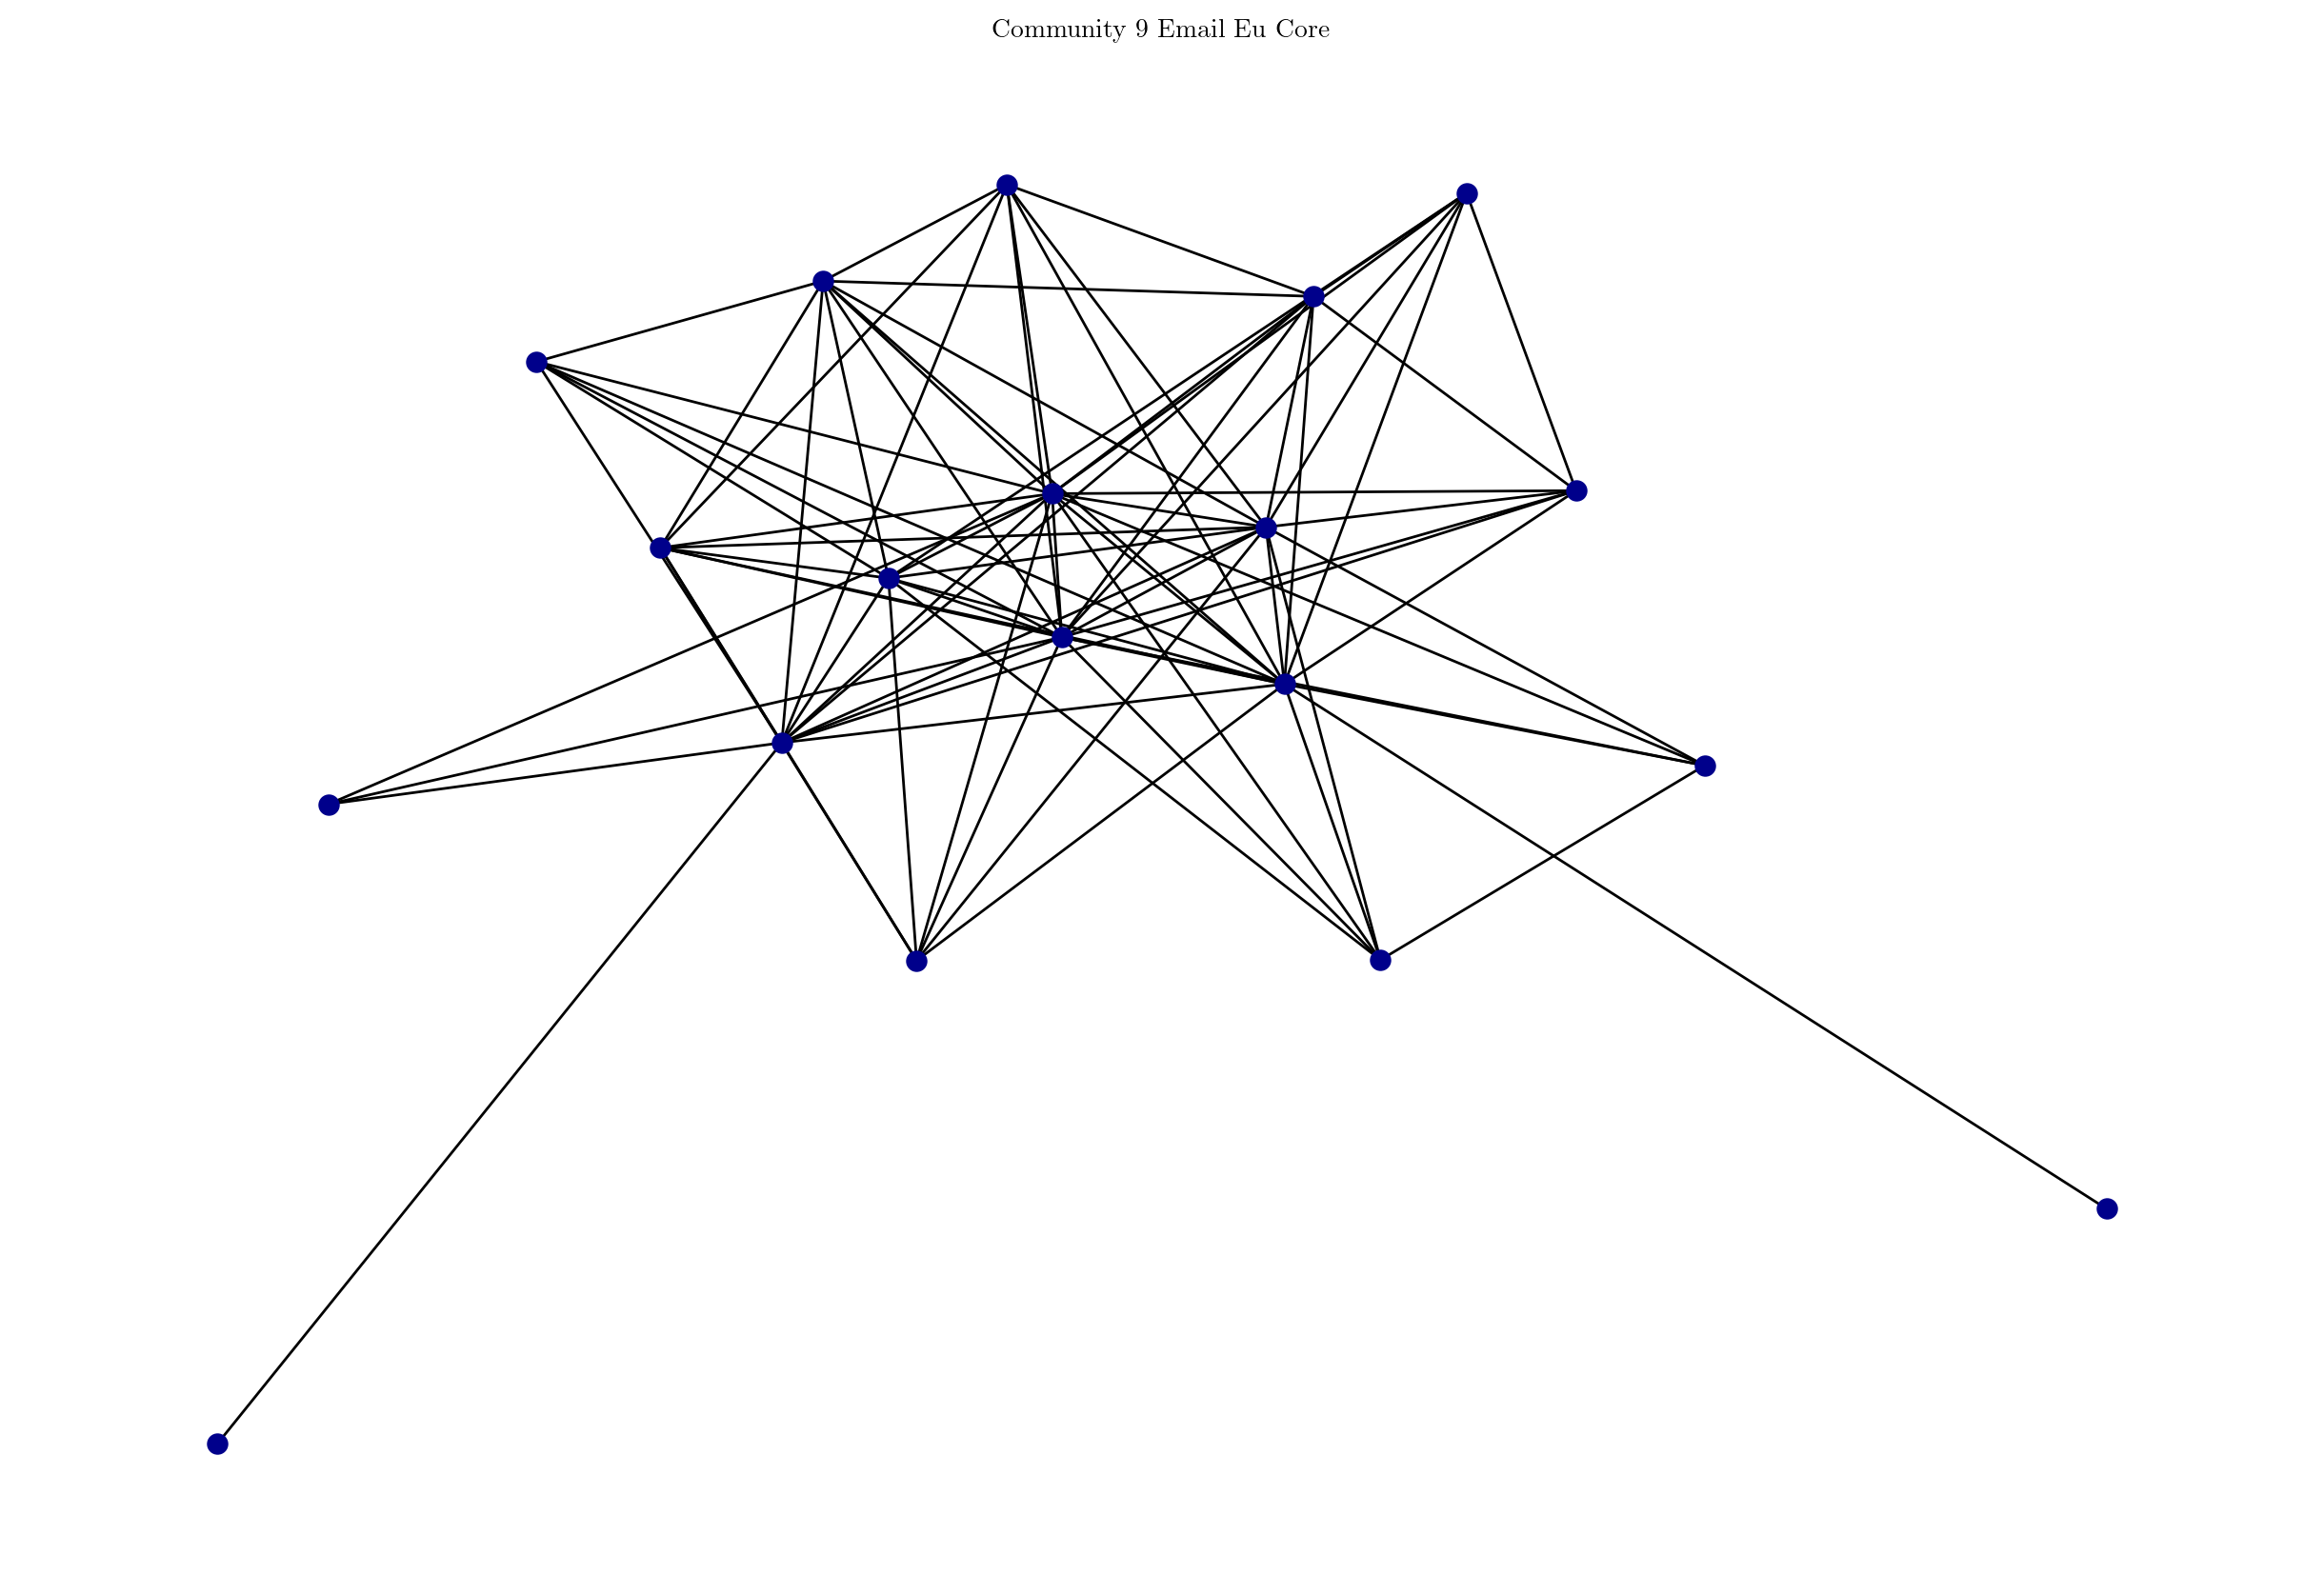

In [67]:
plotRandomCommunity(G_eu, comm_eu, "Email Eu Core")

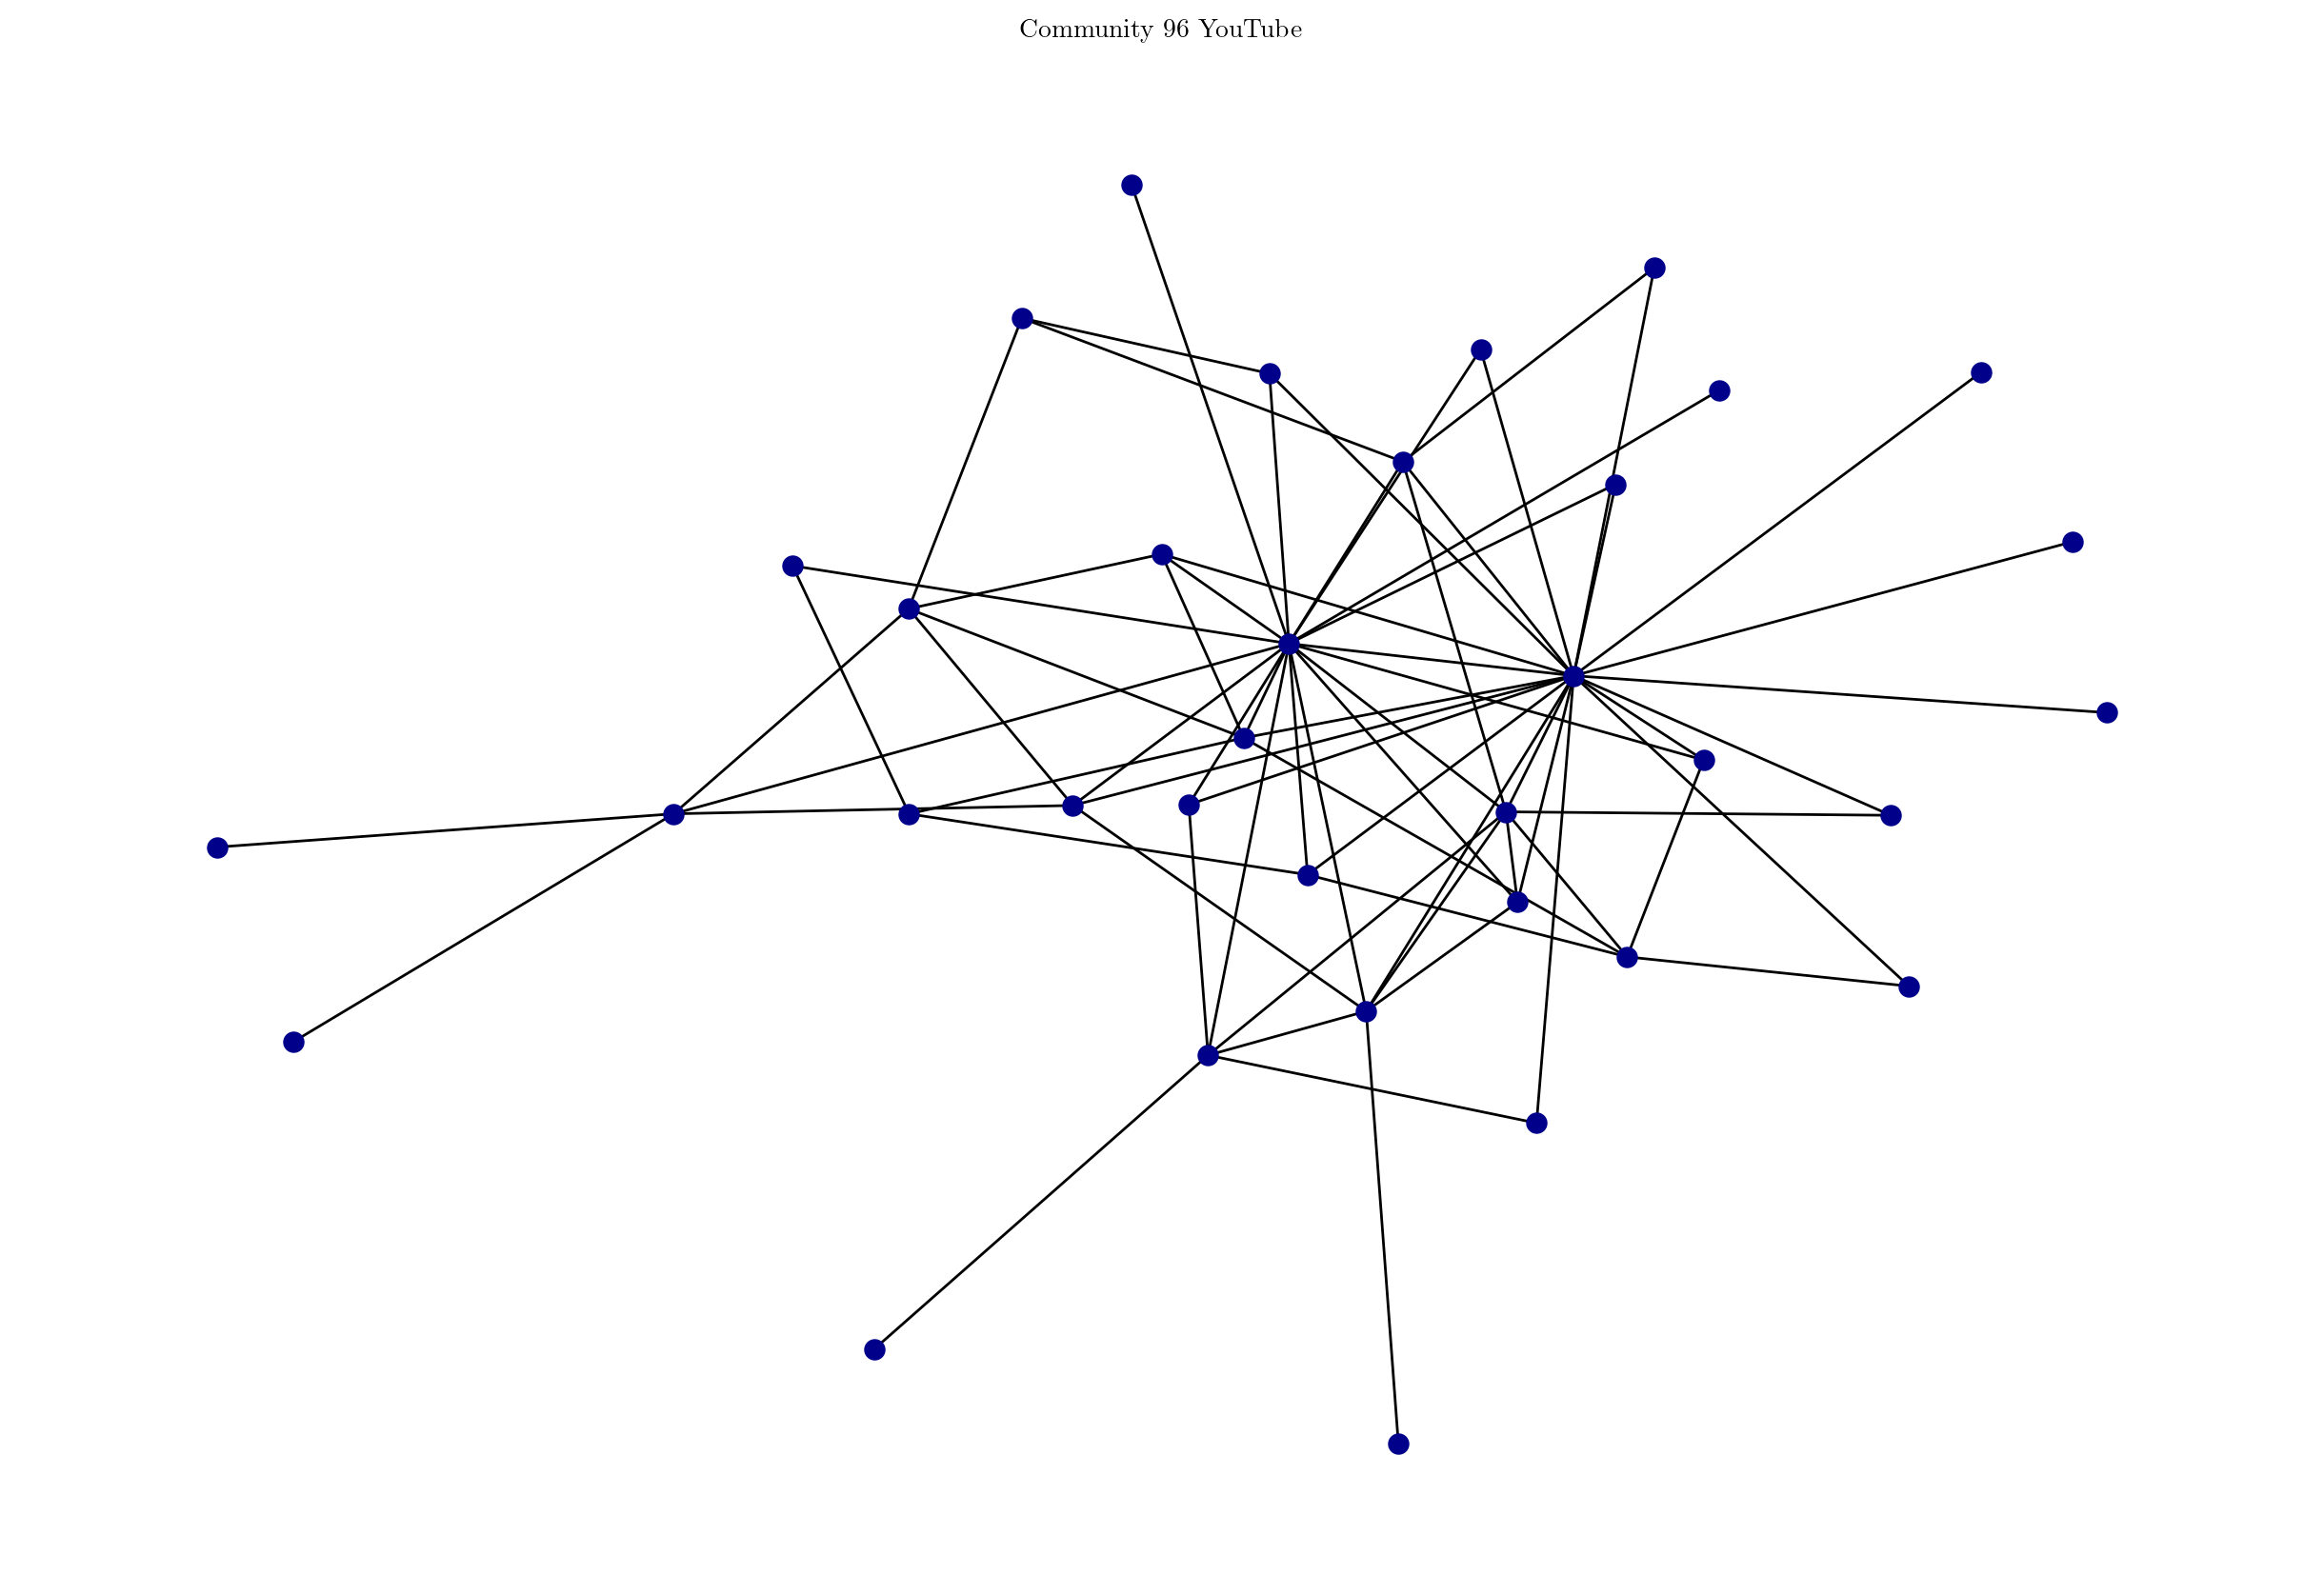

In [24]:
plotRandomCommunity(G_ind_YT, communitiesYT, title = "YouTube")

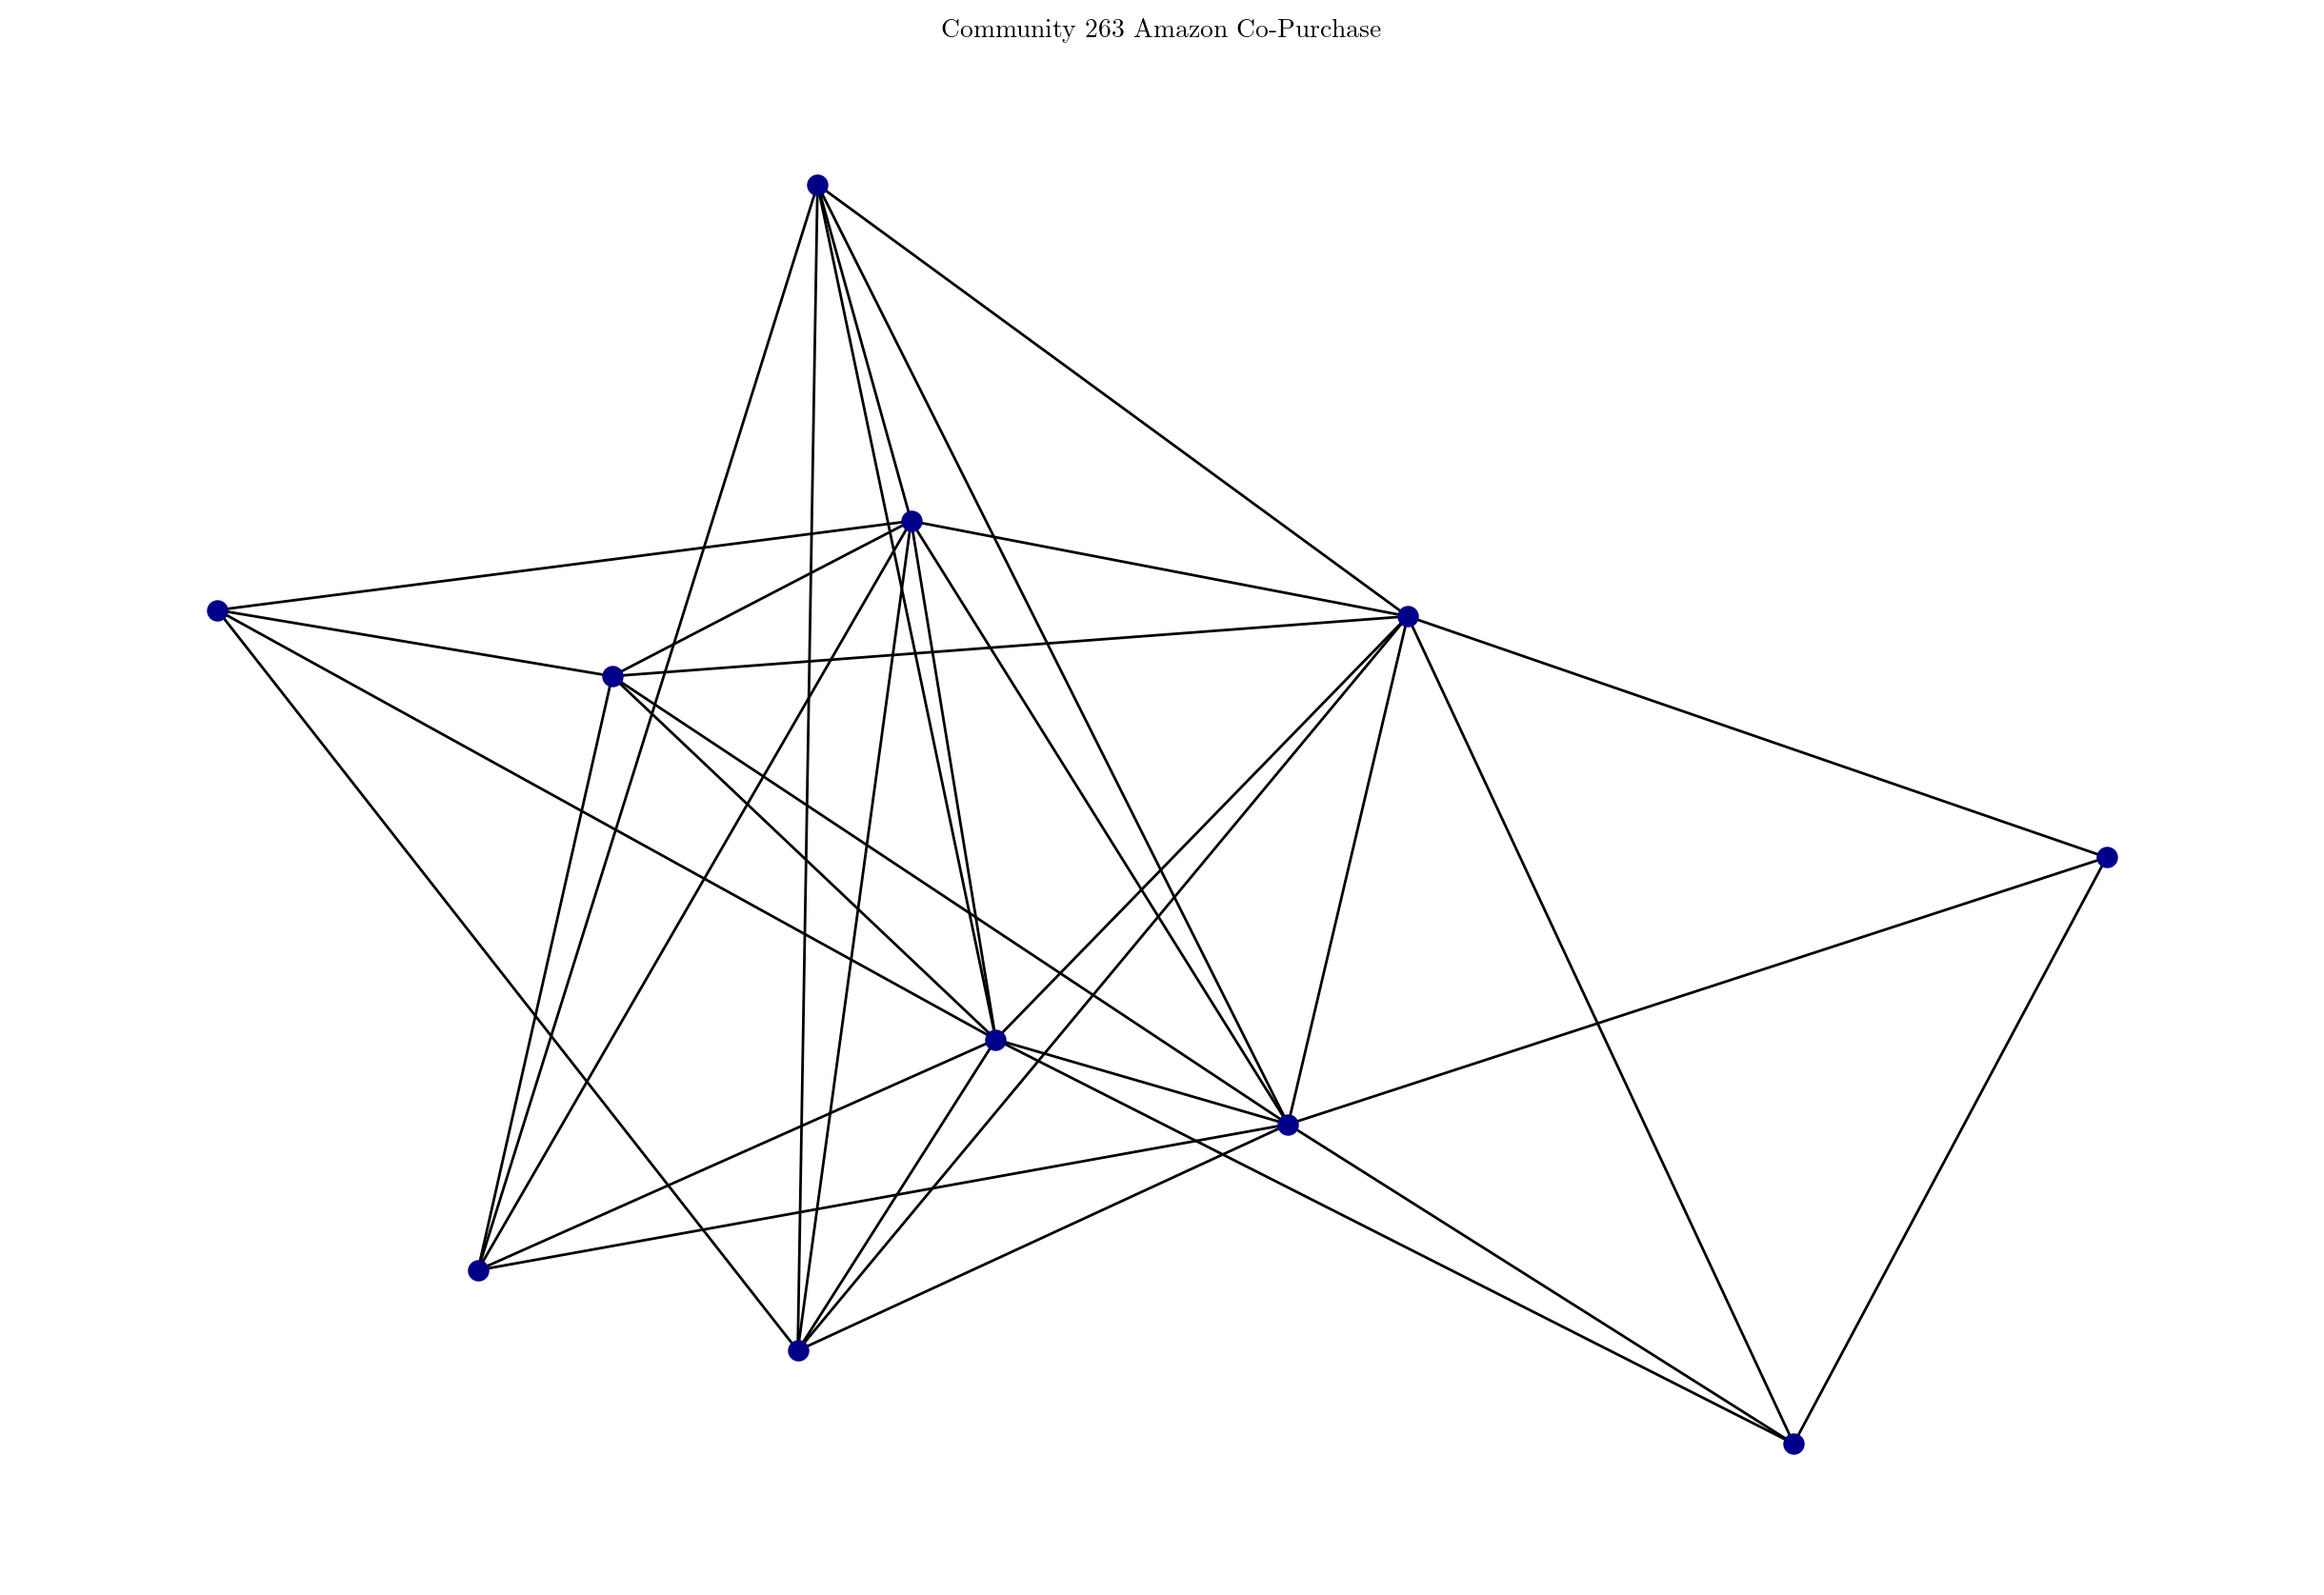

In [68]:
plotRandomCommunity(G_ind_Amz, communitiesAmazon, title = "Amazon Co-Purchase")

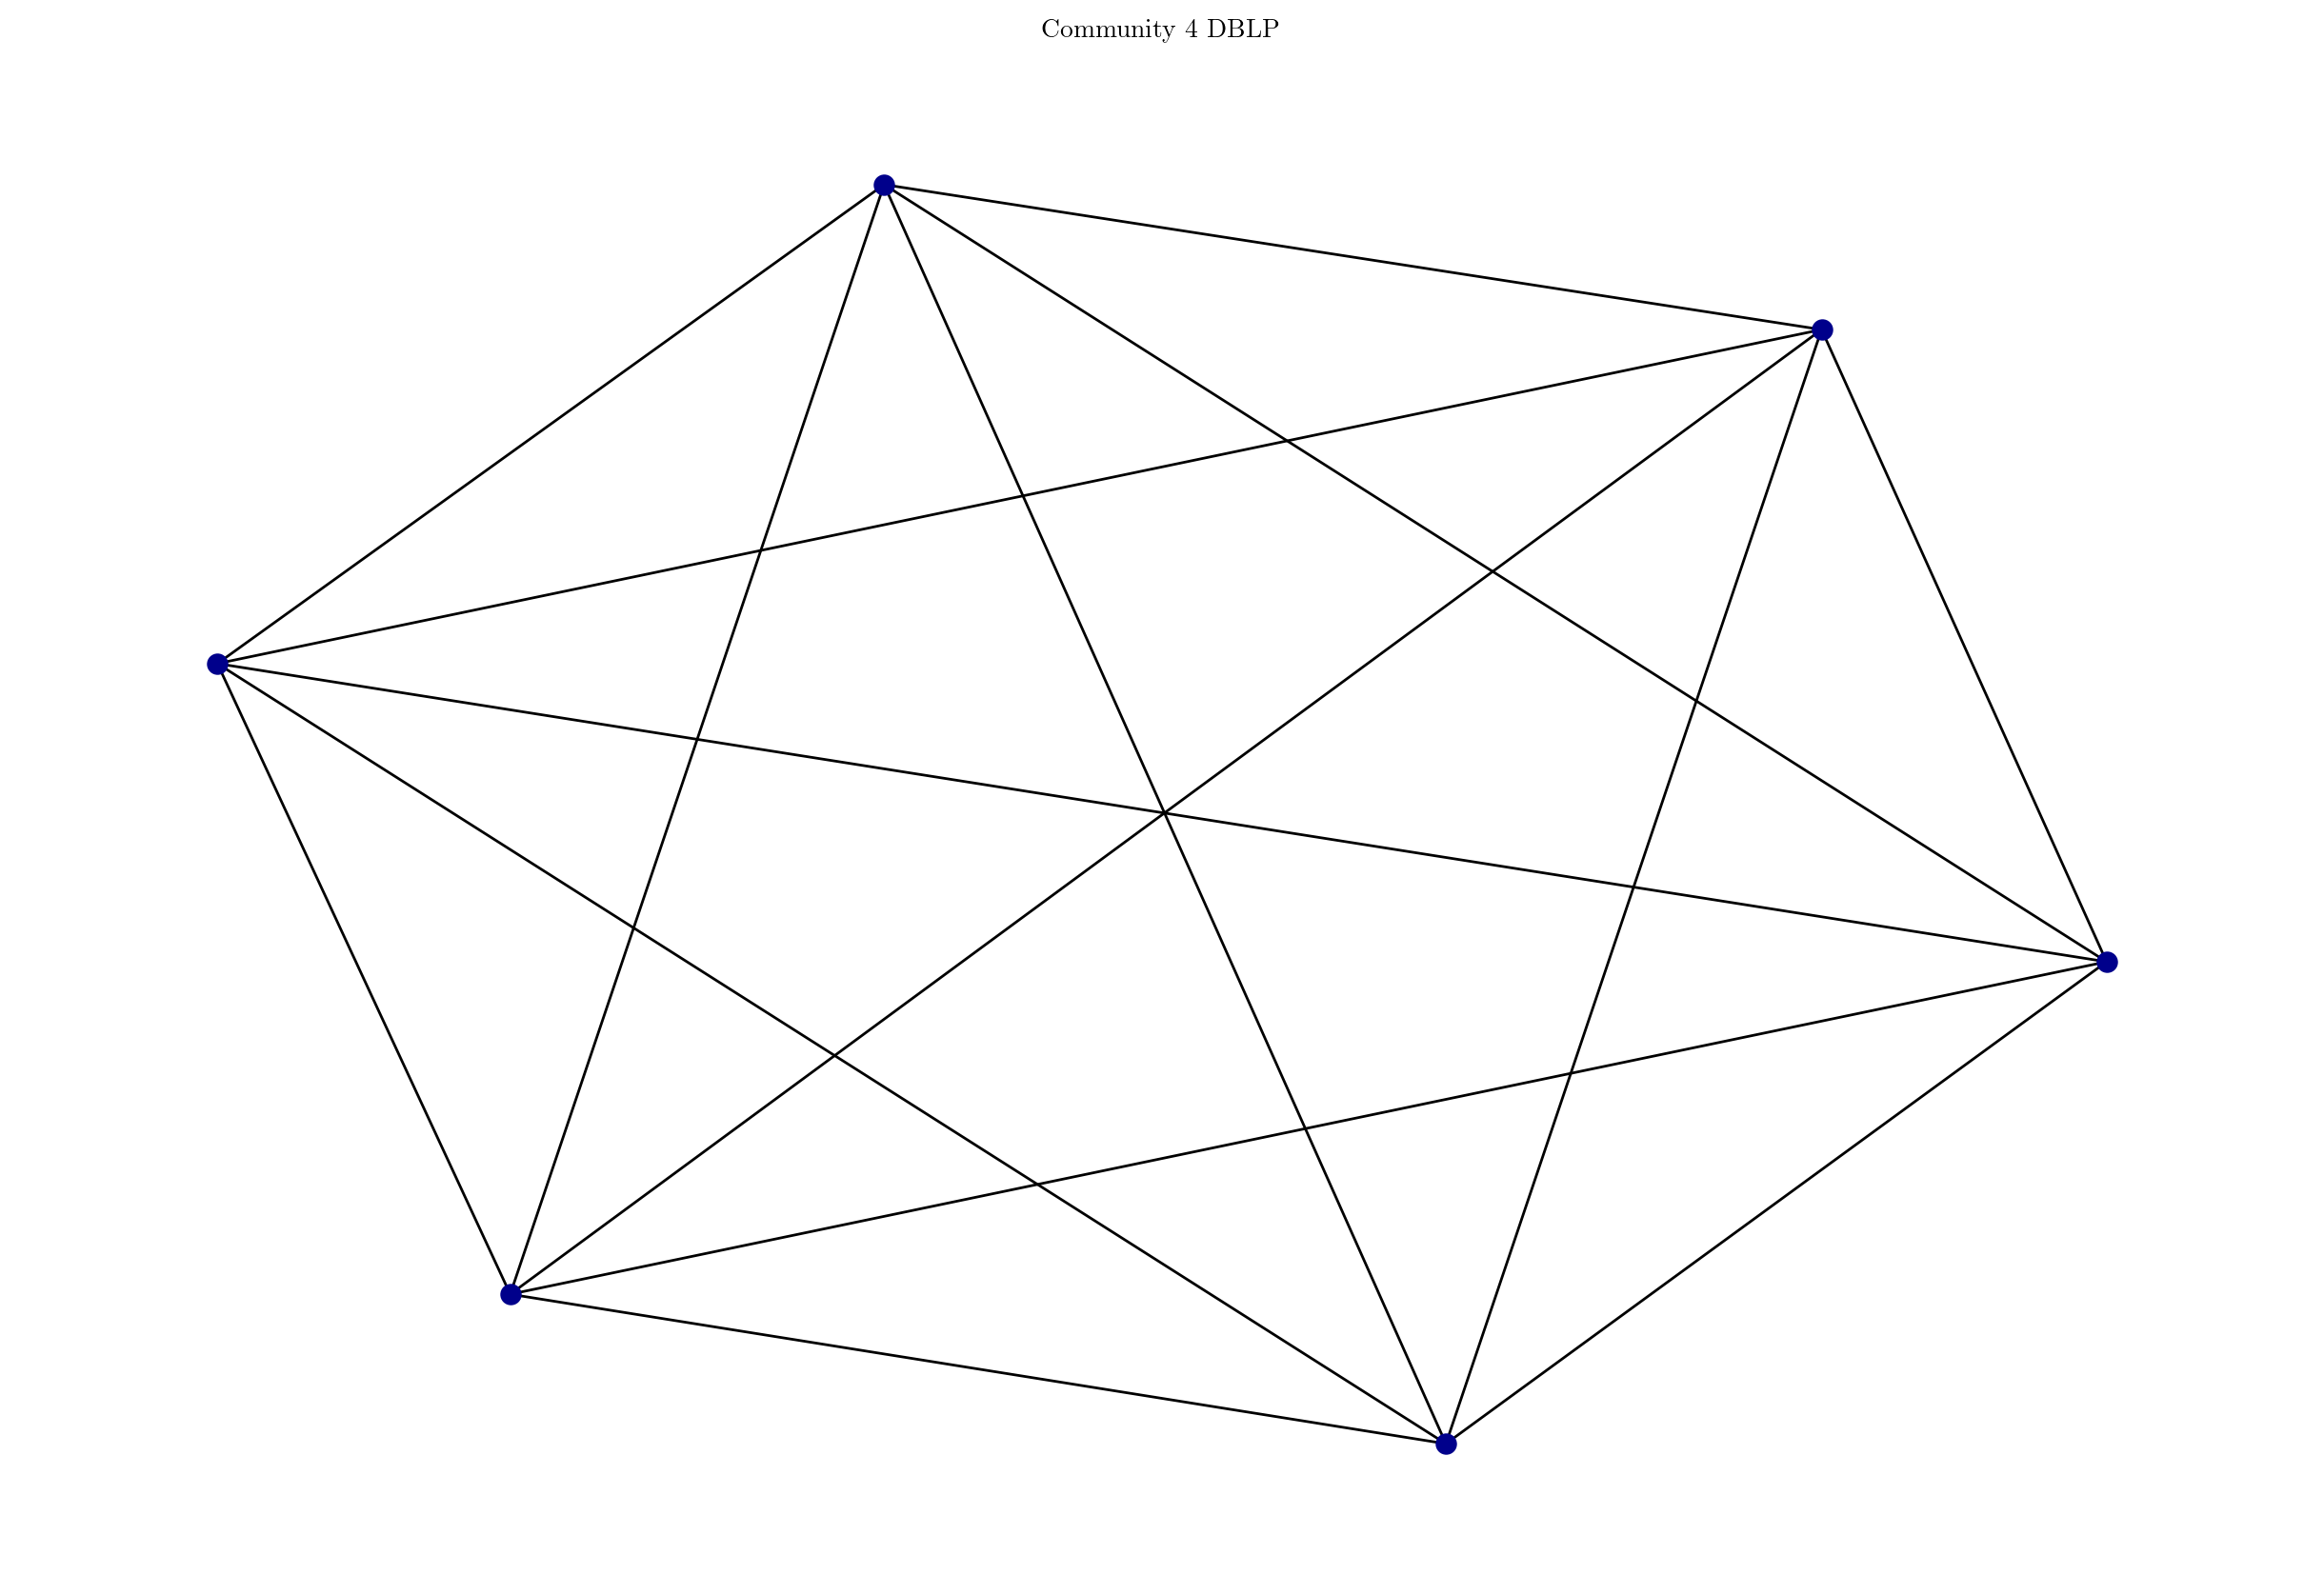

In [69]:
plotRandomCommunity(G_ind_DBLP, communitiesDBLP, title = "DBLP")

### Functions to Communities as List of Nodes ```get_community_dict``` and Mapping of Community Labels to Nodes ```get_communities```

In [70]:
from collections import defaultdict

def get_community_dict(communities):
    community_dict = {}
    for i, community in enumerate(communities):
        for node in community:
            community_dict[node] = i
    return community_dict


def get_communities(community_dict):
    communities = defaultdict(list)
    for node, comm_id in community_dict.items():
        communities[comm_id].append(node)
    return communities

In [71]:
ground_comm_amazon = get_community_dict(list(communitiesAmazon.values()))

In [72]:
print(ground_comm_amazon)

{164985: 0, 225214: 0, 232761: 0, 105089: 1, 282815: 1, 331787: 1, 167906: 2, 288975: 2, 421279: 2, 442612: 2, 451312: 2, 69880: 3, 231953: 3, 518997: 3, 523128: 3, 135499: 4, 160294: 4, 304770: 4, 112813: 203, 112814: 203, 112821: 203, 112823: 203, 199372: 7, 399560: 7, 447268: 7, 471226: 7, 522928: 7, 179001: 8, 391697: 8, 412528: 8, 21166: 9, 207188: 9, 405926: 9, 531532: 9, 540207: 9, 118948: 10, 191846: 10, 209822: 10, 455700: 10, 482725: 10, 55727: 298, 78359: 298, 170327: 298, 335007: 298, 12147: 16, 73388: 16, 178783: 16, 269070: 16, 439998: 16, 24632: 17, 82995: 17, 156987: 17, 236045: 17, 280502: 17, 42888: 18, 58675: 18, 217362: 18, 260685: 18, 4092: 19, 104191: 19, 128901: 19, 341575: 19, 389644: 19, 413419: 19, 246337: 21, 301834: 21, 353399: 21, 497007: 21, 533982: 21, 213603: 160, 213604: 160, 213613: 160, 213615: 160, 213617: 160, 249025: 160, 219649: 267, 233695: 267, 337976: 267, 337981: 267, 444709: 267, 499056: 267, 99505: 26, 126694: 26, 133115: 26, 264885: 26, 502

In [73]:
AZ_Louvain = community.community_louvain.best_partition(G_ind_Amz)
AZ_Louvain_comm = get_communities(AZ_Louvain)
print(AZ_Louvain)

{442368: 0, 172036: 1, 188421: 2, 32781: 3, 155666: 4, 229395: 5, 204831: 6, 221215: 7, 524325: 8, 319527: 9, 311349: 10, 163894: 11, 24632: 12, 311354: 1, 49211: 13, 499772: 14, 16457: 15, 163914: 16, 516170: 17, 196682: 15, 65611: 18, 49243: 195, 213093: 20, 508006: 35, 286824: 13, 57455: 22, 499824: 2, 82034: 108, 49268: 195, 188534: 22, 124: 158, 24701: 11, 128: 25, 319626: 26, 139407: 27, 450706: 28, 344212: 29, 368792: 30, 131232: 31, 270508: 32, 385197: 33, 377006: 34, 213167: 35, 164015: 18, 286893: 36, 176: 31, 417972: 37, 540854: 38, 114872: 39, 540862: 40, 377023: 41, 352450: 42, 164035: 43, 295115: 44, 237771: 45, 377039: 46, 123091: 47, 196822: 48, 123096: 49, 245977: 18, 155864: 50, 303329: 51, 442607: 52, 385265: 9, 344307: 168, 442612: 54, 270592: 7, 205060: 55, 418053: 56, 311567: 57, 41233: 58, 516373: 59, 237846: 60, 147735: 61, 516378: 62, 74012: 63, 33054: 64, 164133: 65, 393519: 127, 311601: 59, 491828: 67, 147766: 68, 106810: 26, 188735: 69, 500036: 57, 33116: 60

## Helper Functions to Sparsify using Top $k\%$ of High Edge Betweenness Edges, Run the Louvain or Girvan-Newman and Provide the Metrics

In [95]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def edge_betweenness_sparsification(G, k):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edges_to_remove = sorted(edge_betweenness, key = edge_betweenness.get)[:int((1 - k) * G.number_of_edges())]
    H = G.copy()
    for edge in edges_to_remove:
        H.remove_edge(*edge)
    return H

def run_louvain(G):
    communities = community.community_louvain.best_partition(G)
    return communities

def metrics(ground_truth, predicted):
    ari = adjusted_rand_score(list(ground_truth.values()), list(predicted.values()))
    nmi = normalized_mutual_info_score(list(ground_truth.values()), list(predicted.values()))
    return ari, nmi

In [96]:
ari, nmi = metrics(ground_comm_amazon, run_louvain(G_ind_Amz))
print("ARI and NMI for Louvain on Amazon: ", ari, nmi)

ARI and NMI for Louvain on Amazon:  0.004473927314175684 0.5542550600523298


In [97]:
def plot_metrics(G, ground_truth, k_values):
    ari_values = []
    nmi_values = []
    metric_all = []
    SparseGraphs = []
    for k in k_values:
        H = edge_betweenness_sparsification(G, k)
        SparseGraphs.append(H)
        predicted = run_louvain(H)
        ari, nmi = metrics(ground_truth, predicted)
        ari_values.append(ari)
        nmi_values.append(nmi)
        metric_all.append([k, ari, nmi])
    plt.figure(figsize = (12, 8))
    plt.xticks(range(len(k_values)), [f"{100 * k}%" for k in k_values])
    plt.plot(ari_values, label = "ARI", marker = "o")
    plt.plot(nmi_values, label = "NMI", marker = "o")
    for i, txt in enumerate(ari_values):
        plt.annotate(f"{txt:.4f}", (i, ari_values[i]))
    for i, txt in enumerate(nmi_values):
        plt.annotate(f"{txt:.4f}", (i, nmi_values[i]))
    
    plt.xlabel("Percentage Retention of Edges")
    plt.ylabel("Metrics")
    plt.title(f"Louvain Metrics vs k")
    plt.legend()
    plt.grid()
    plt.show()
    return SparseGraphs, metric_all

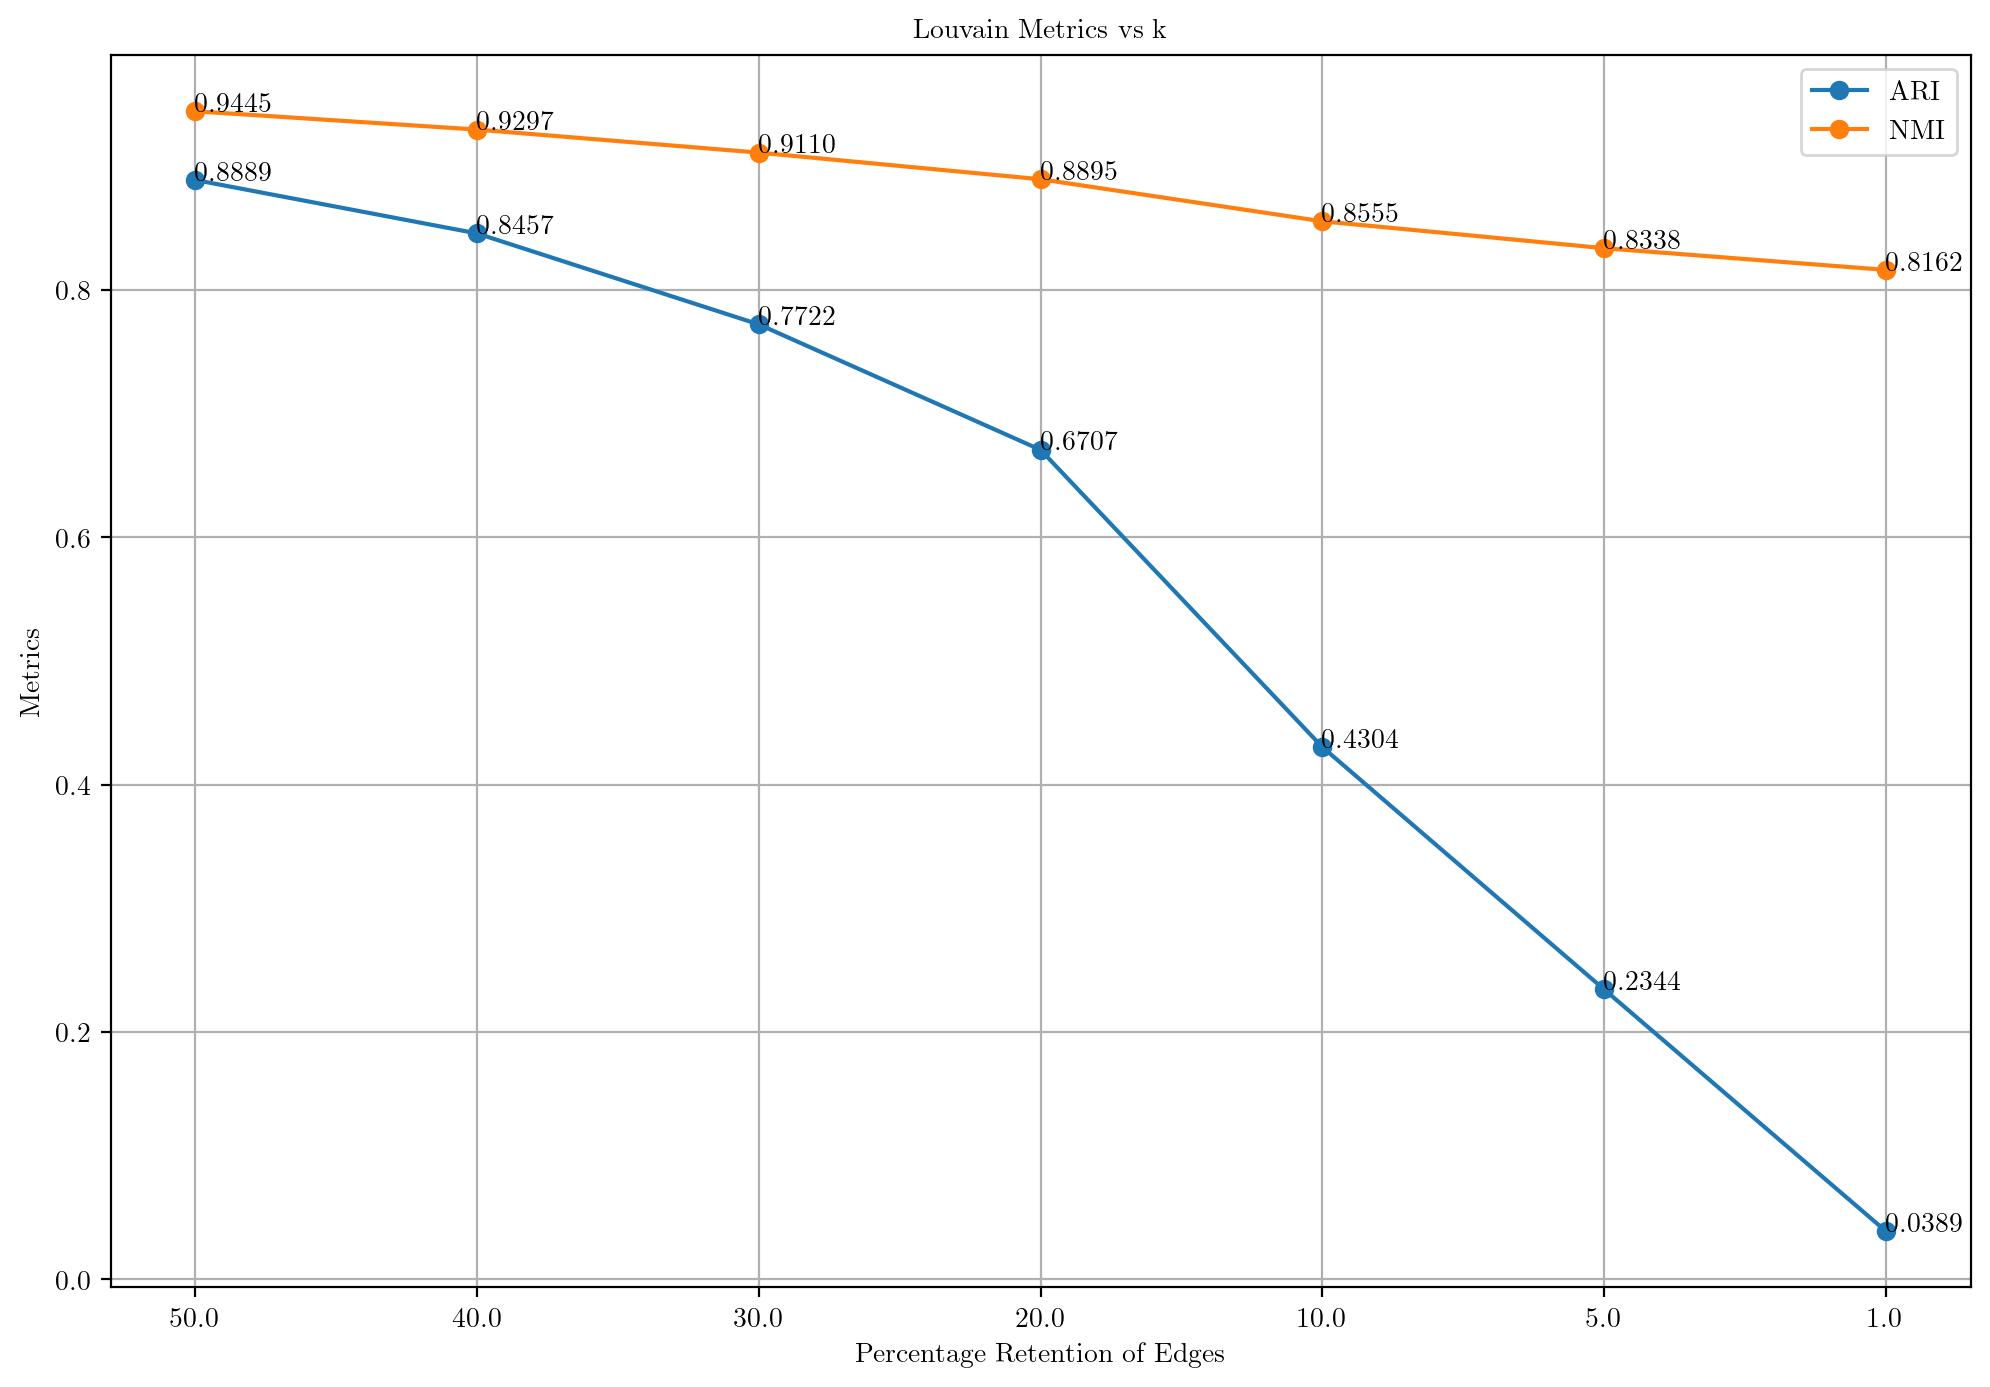

In [98]:
k_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
SparseAmzGraphs, metric_all = plot_metrics(G_ind_Amz, run_louvain(G_ind_Amz), k_values)

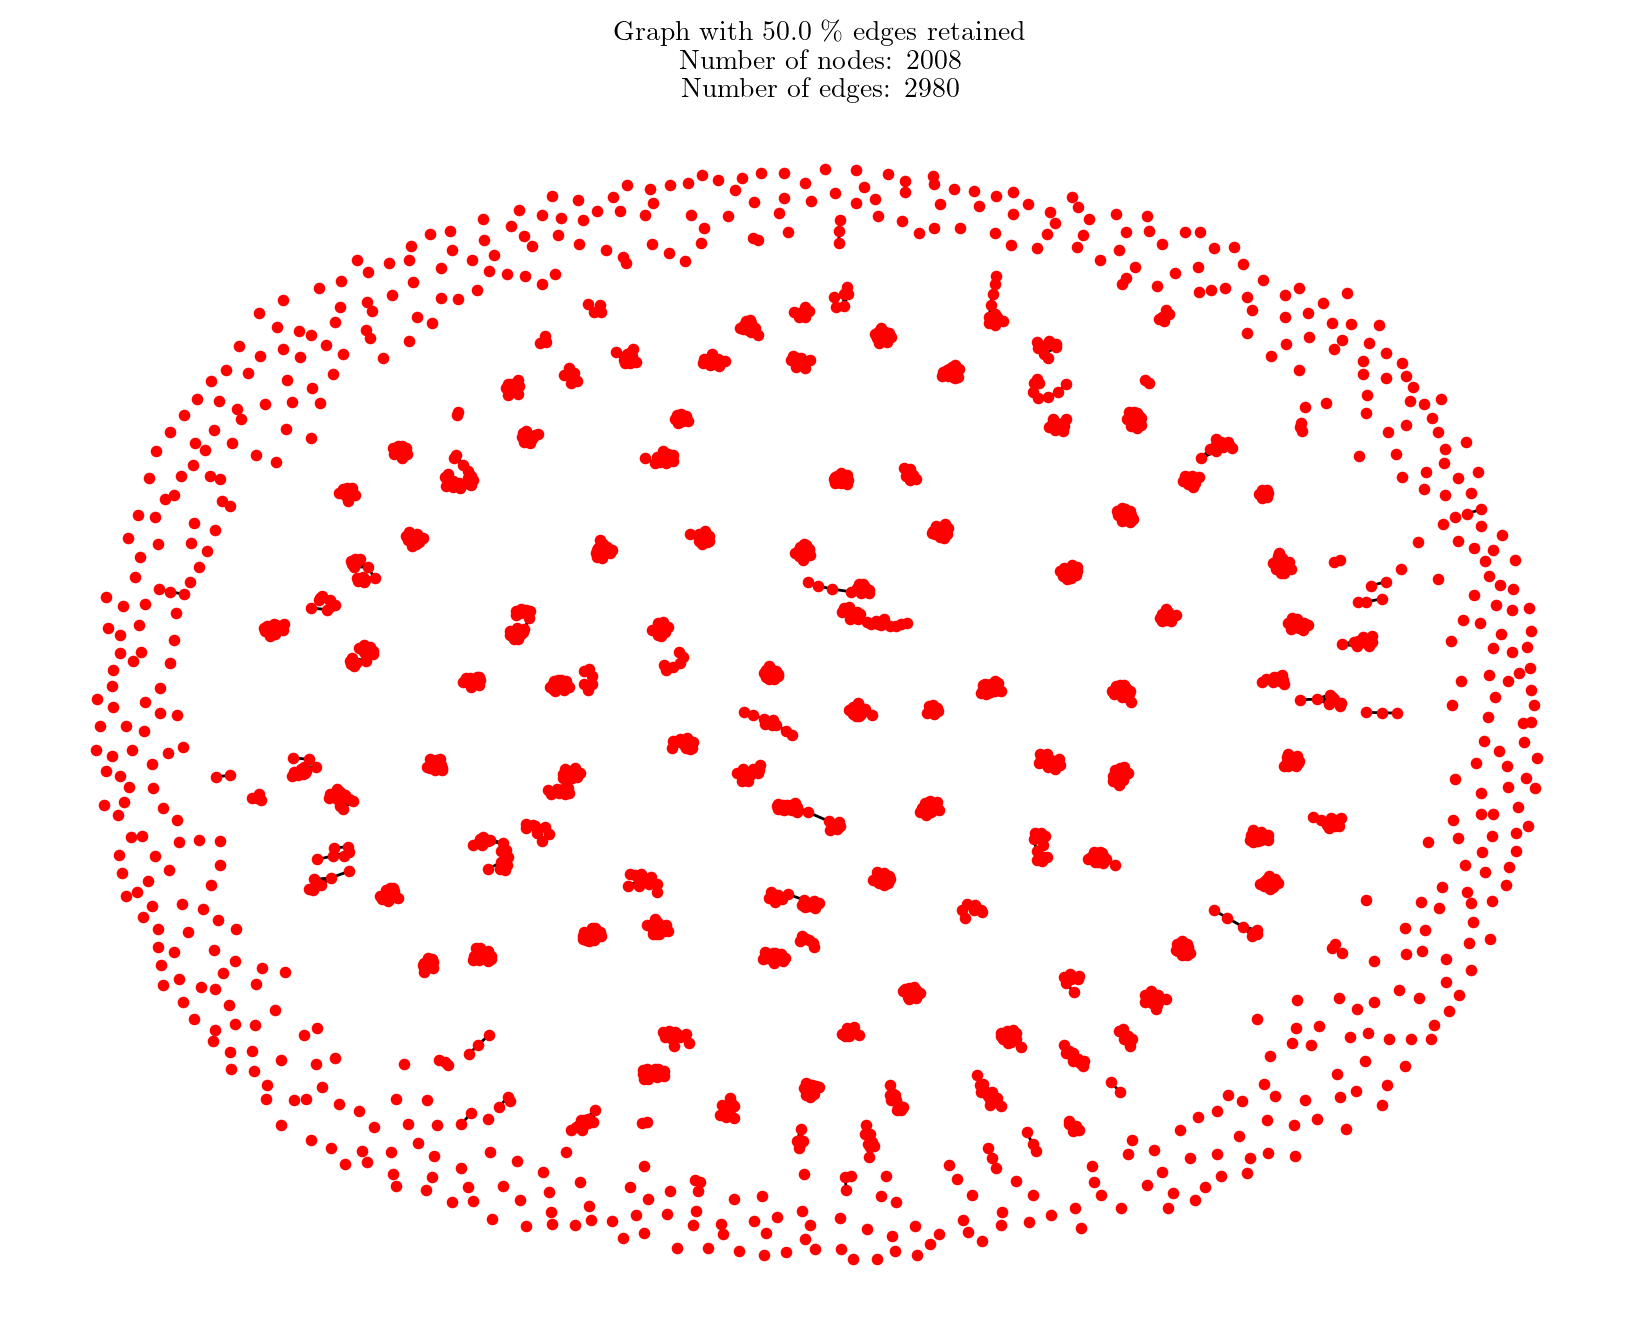

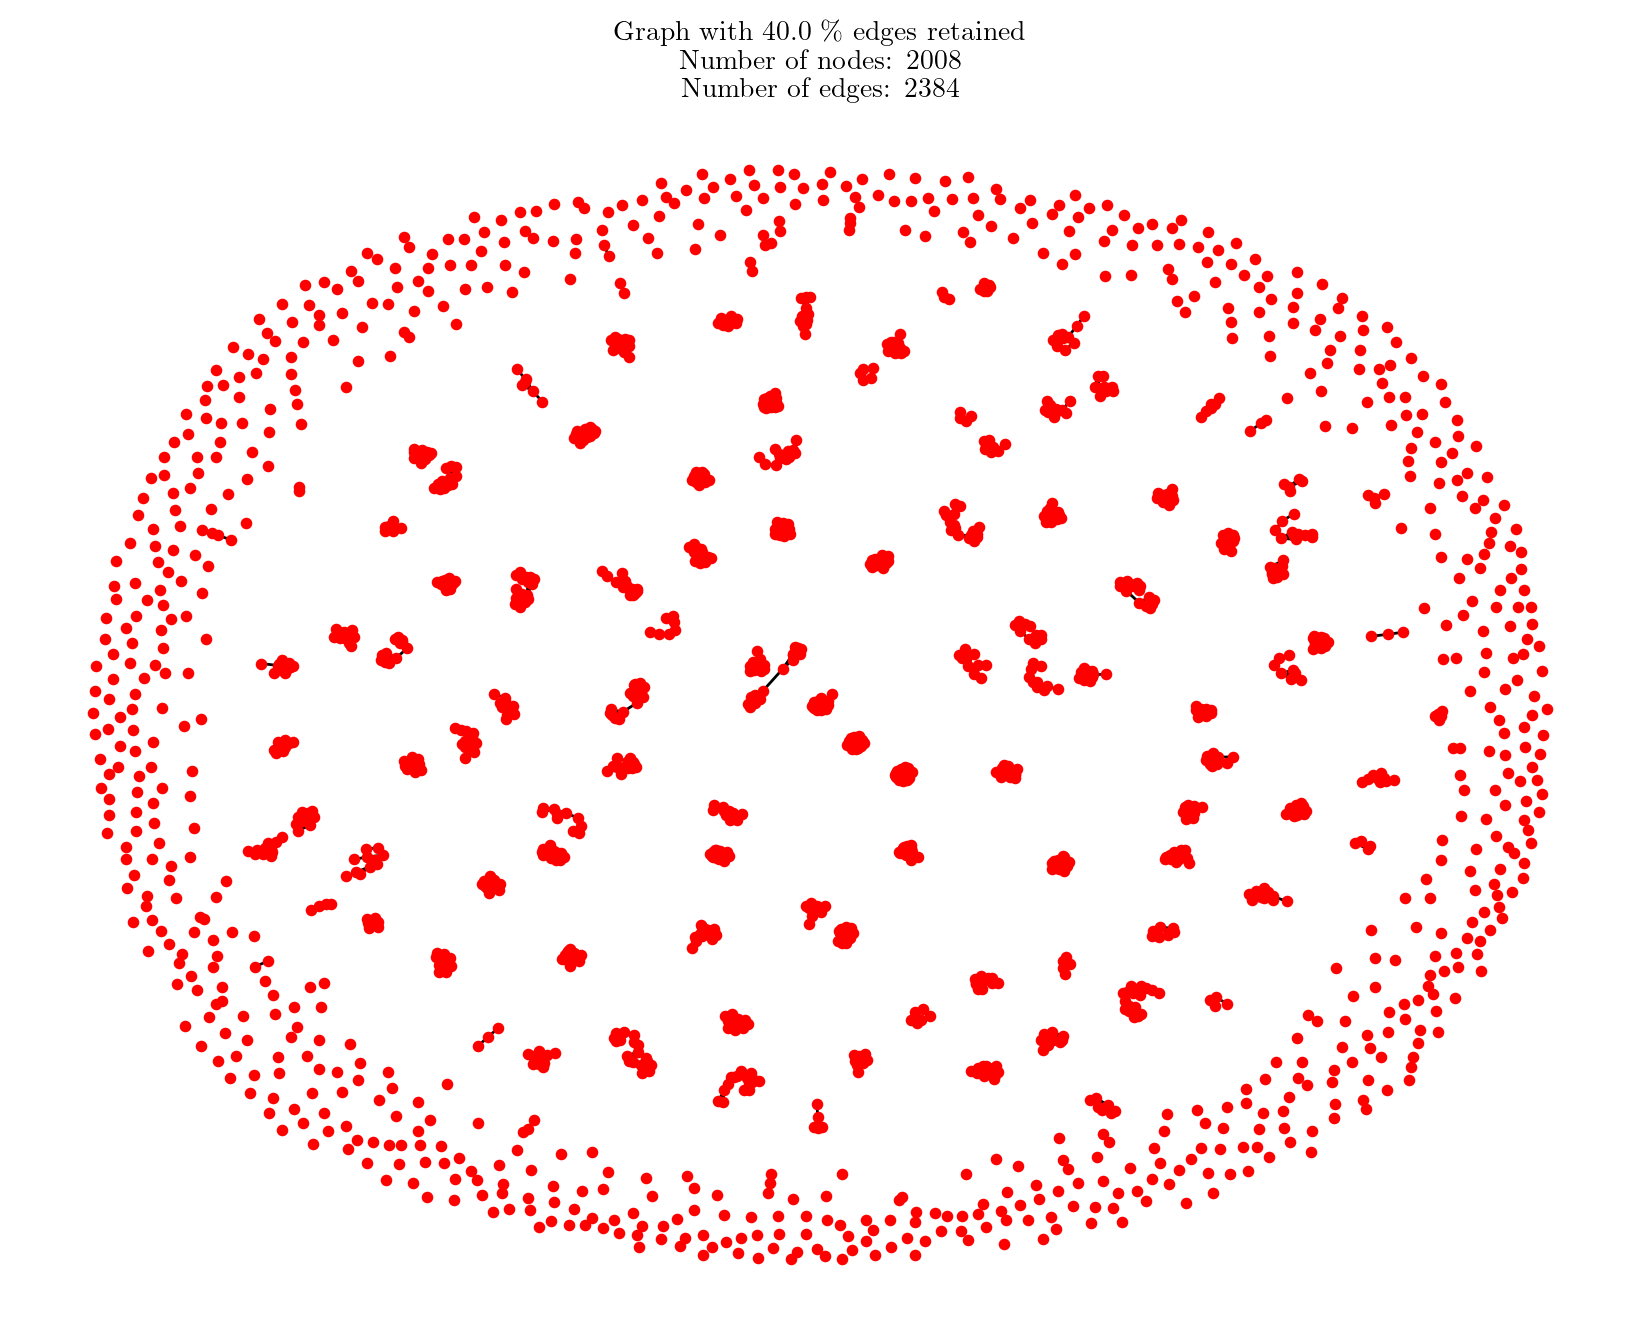

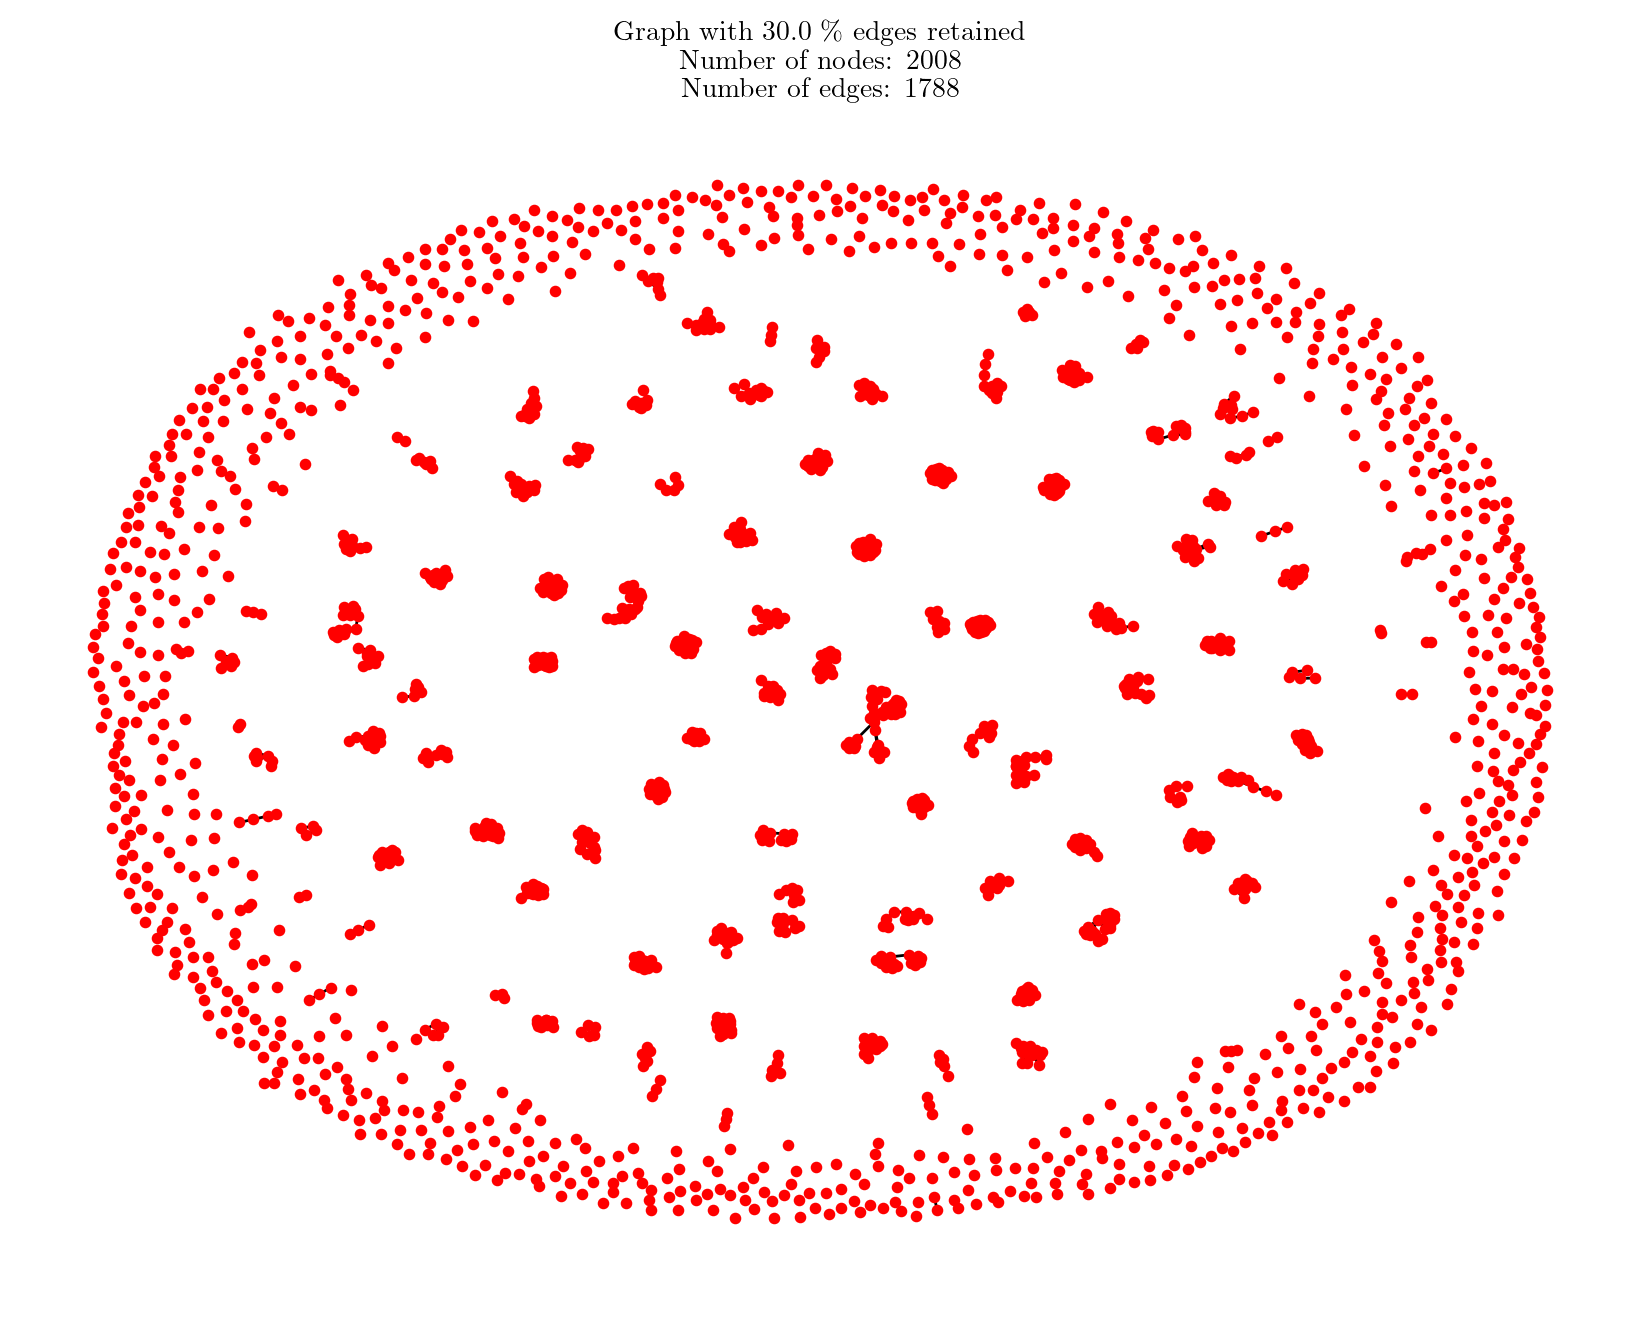

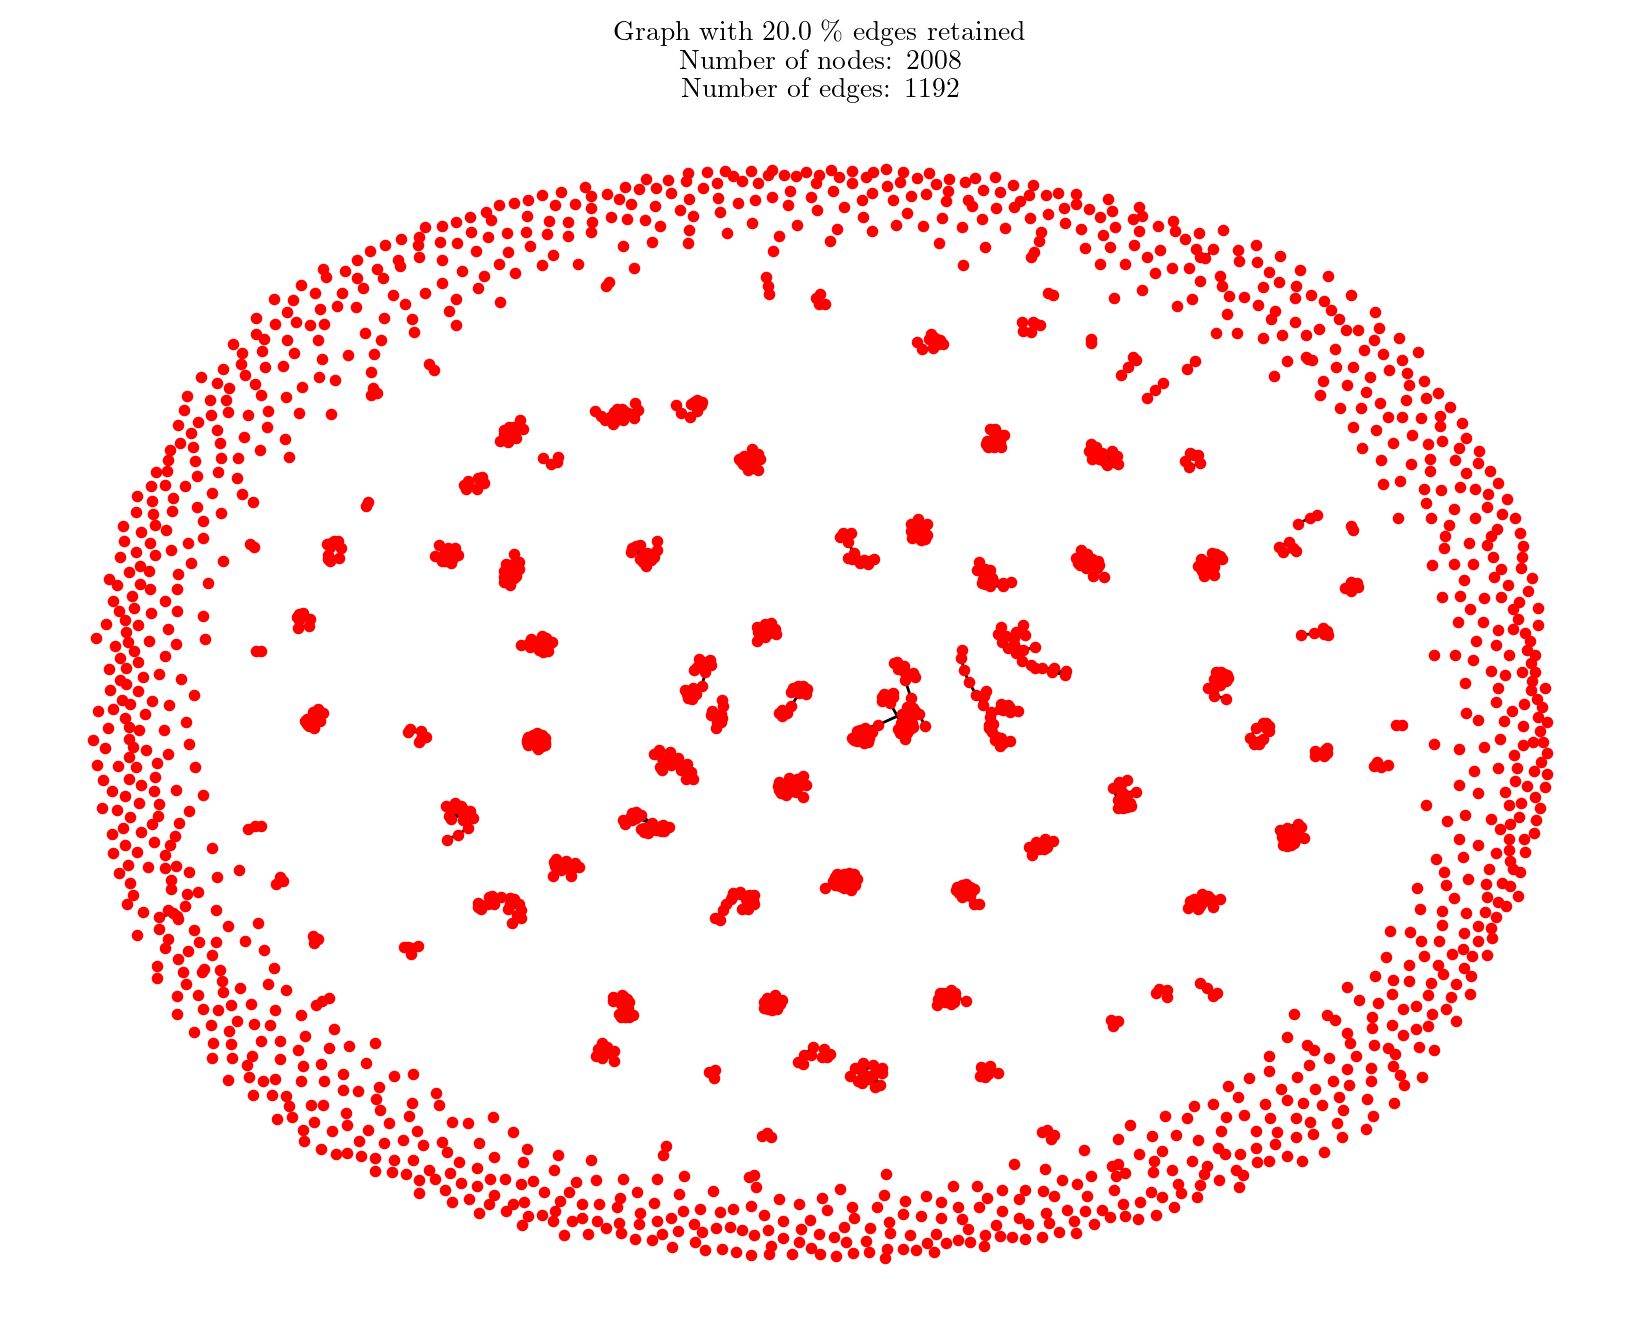

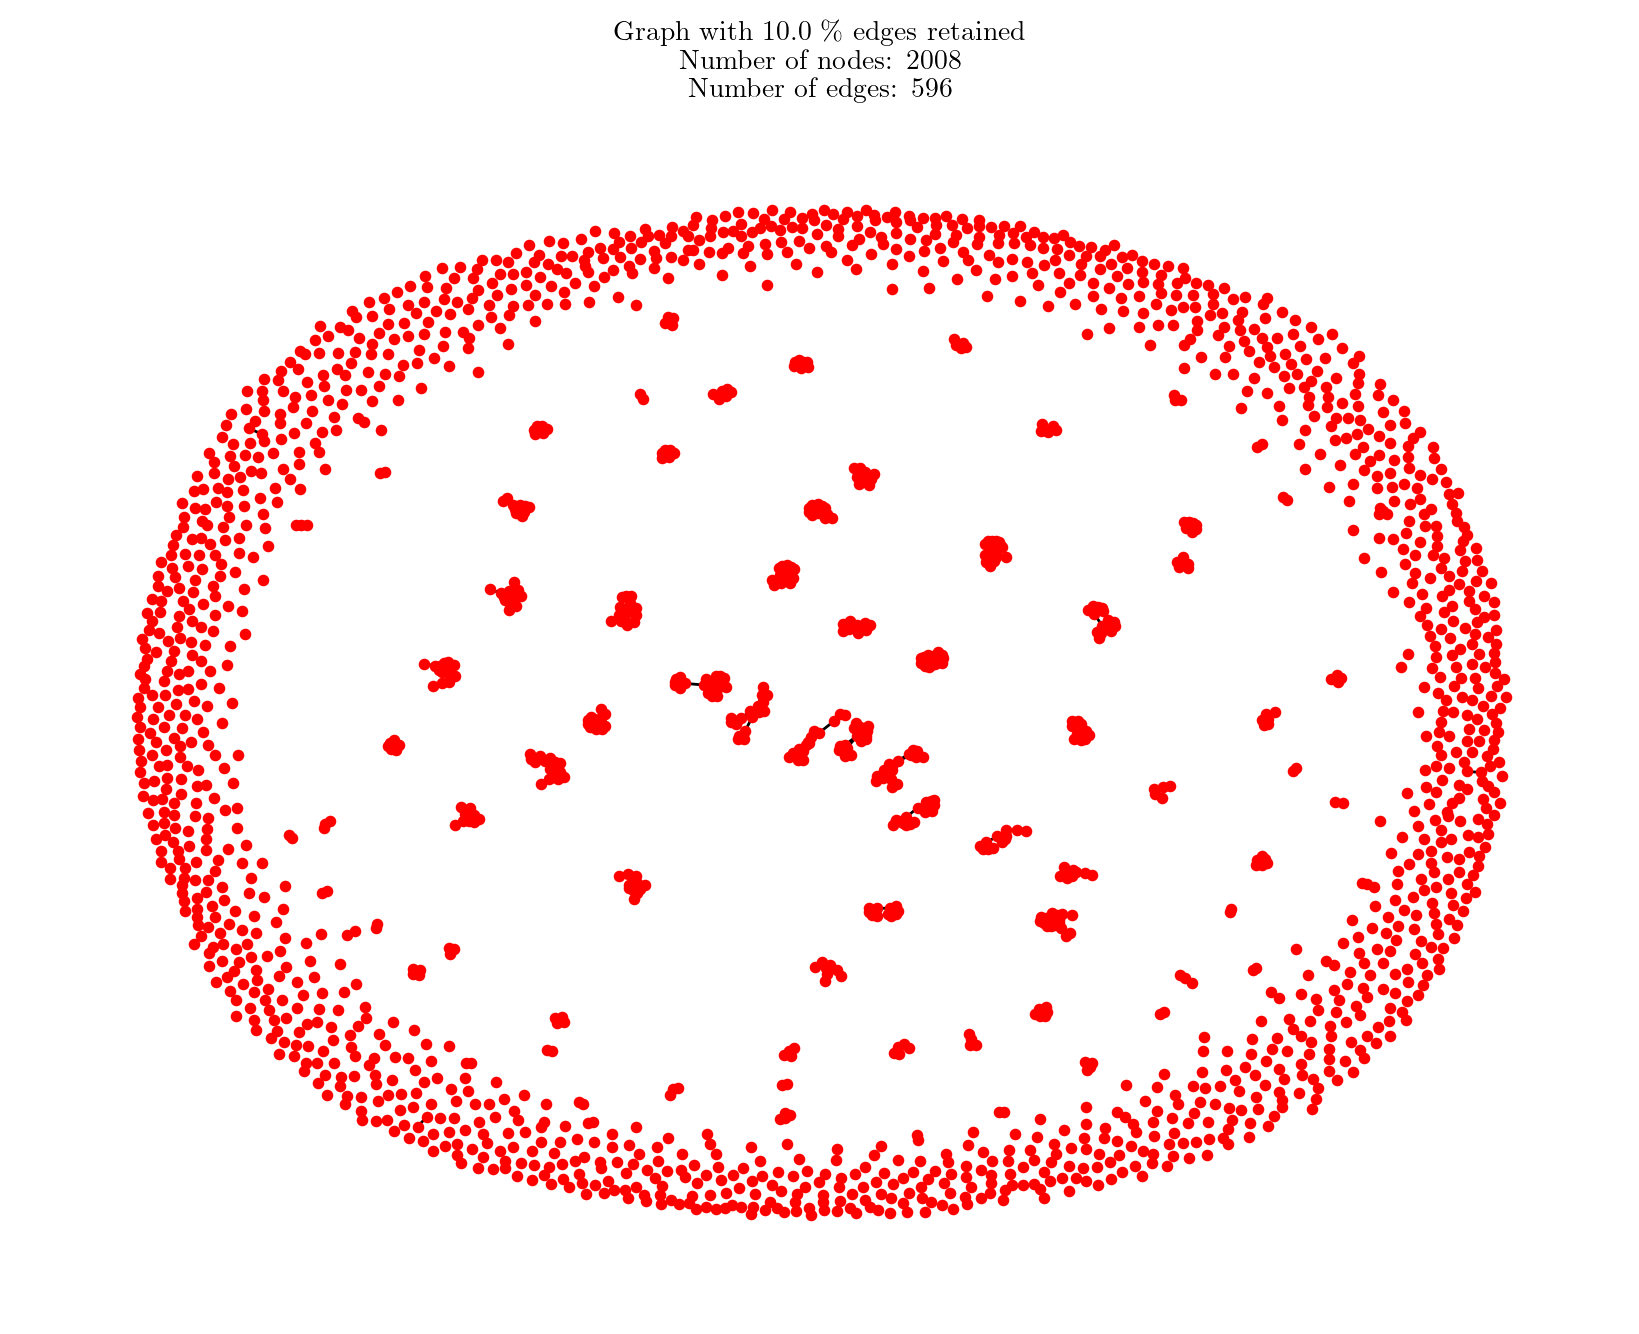

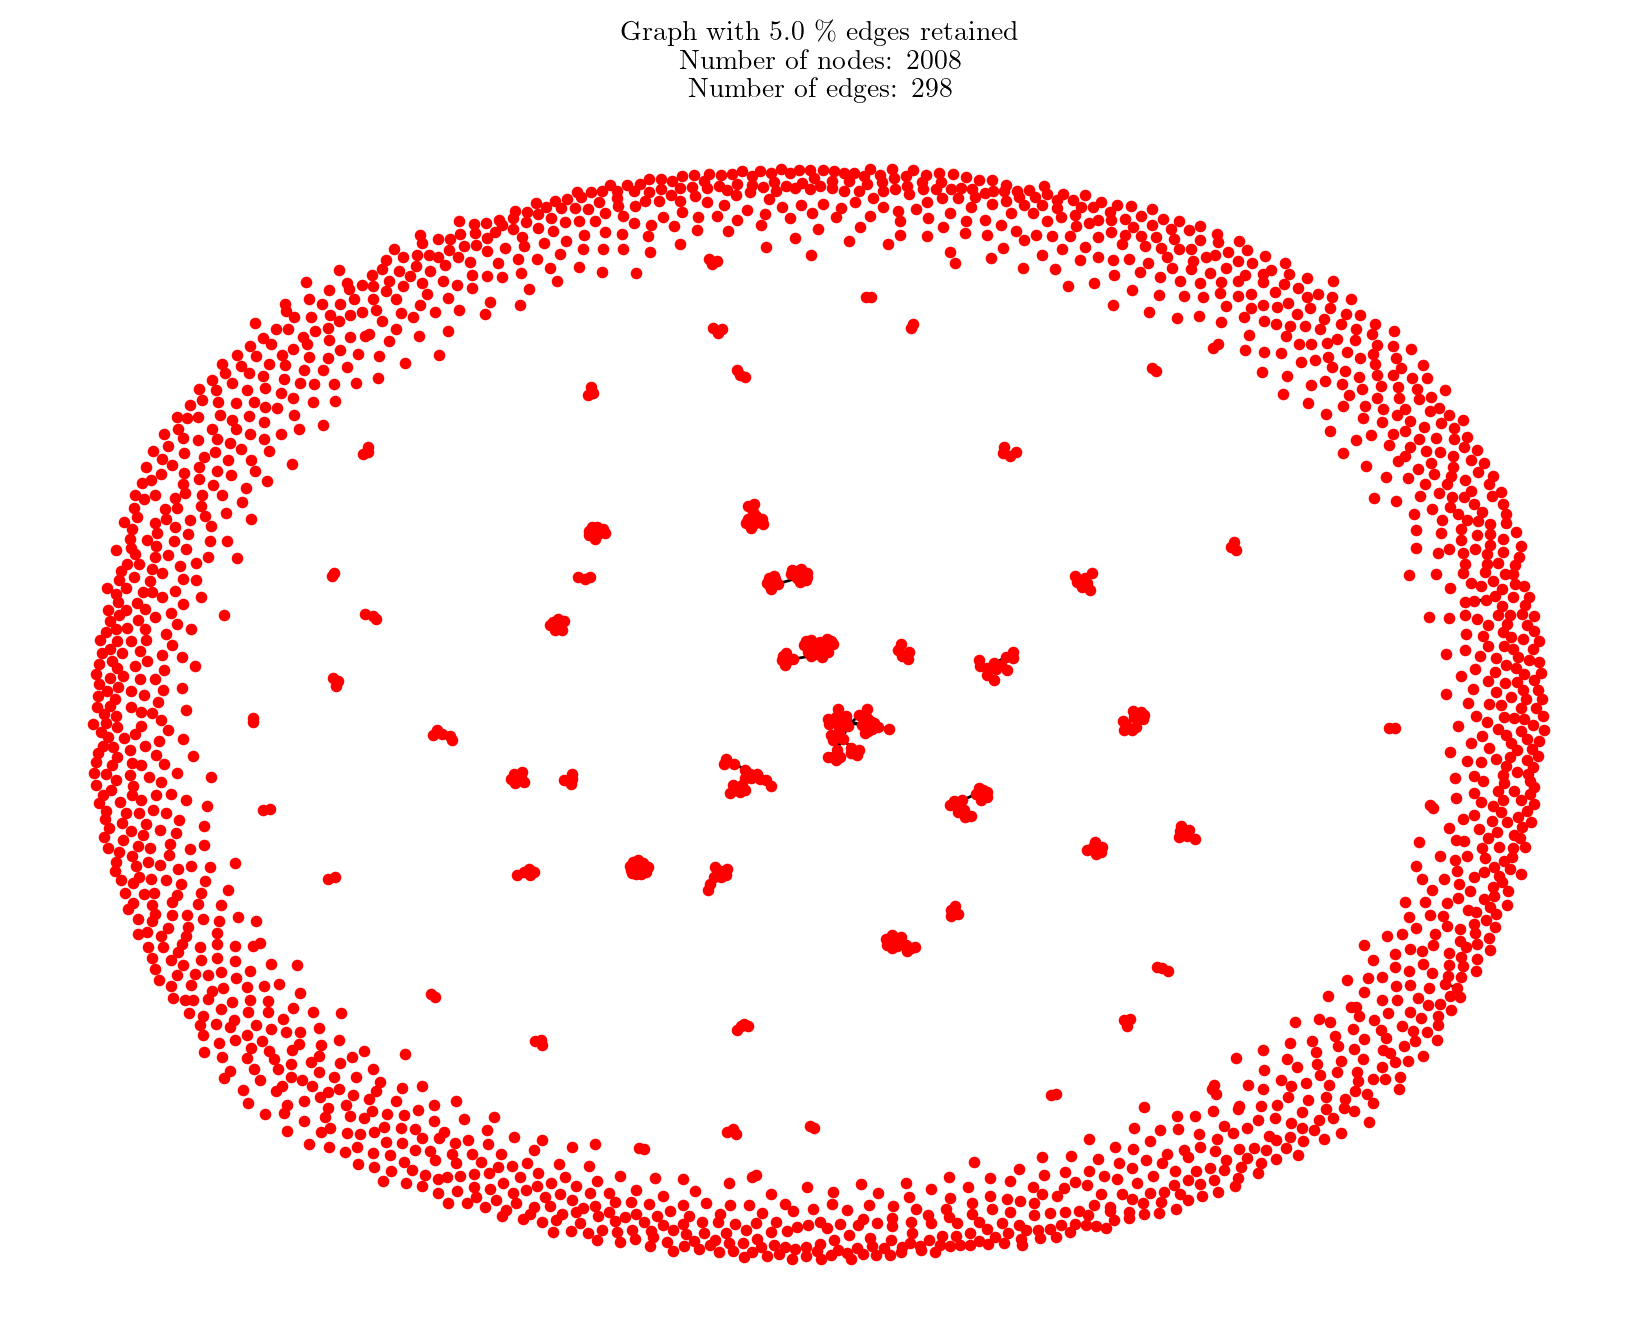

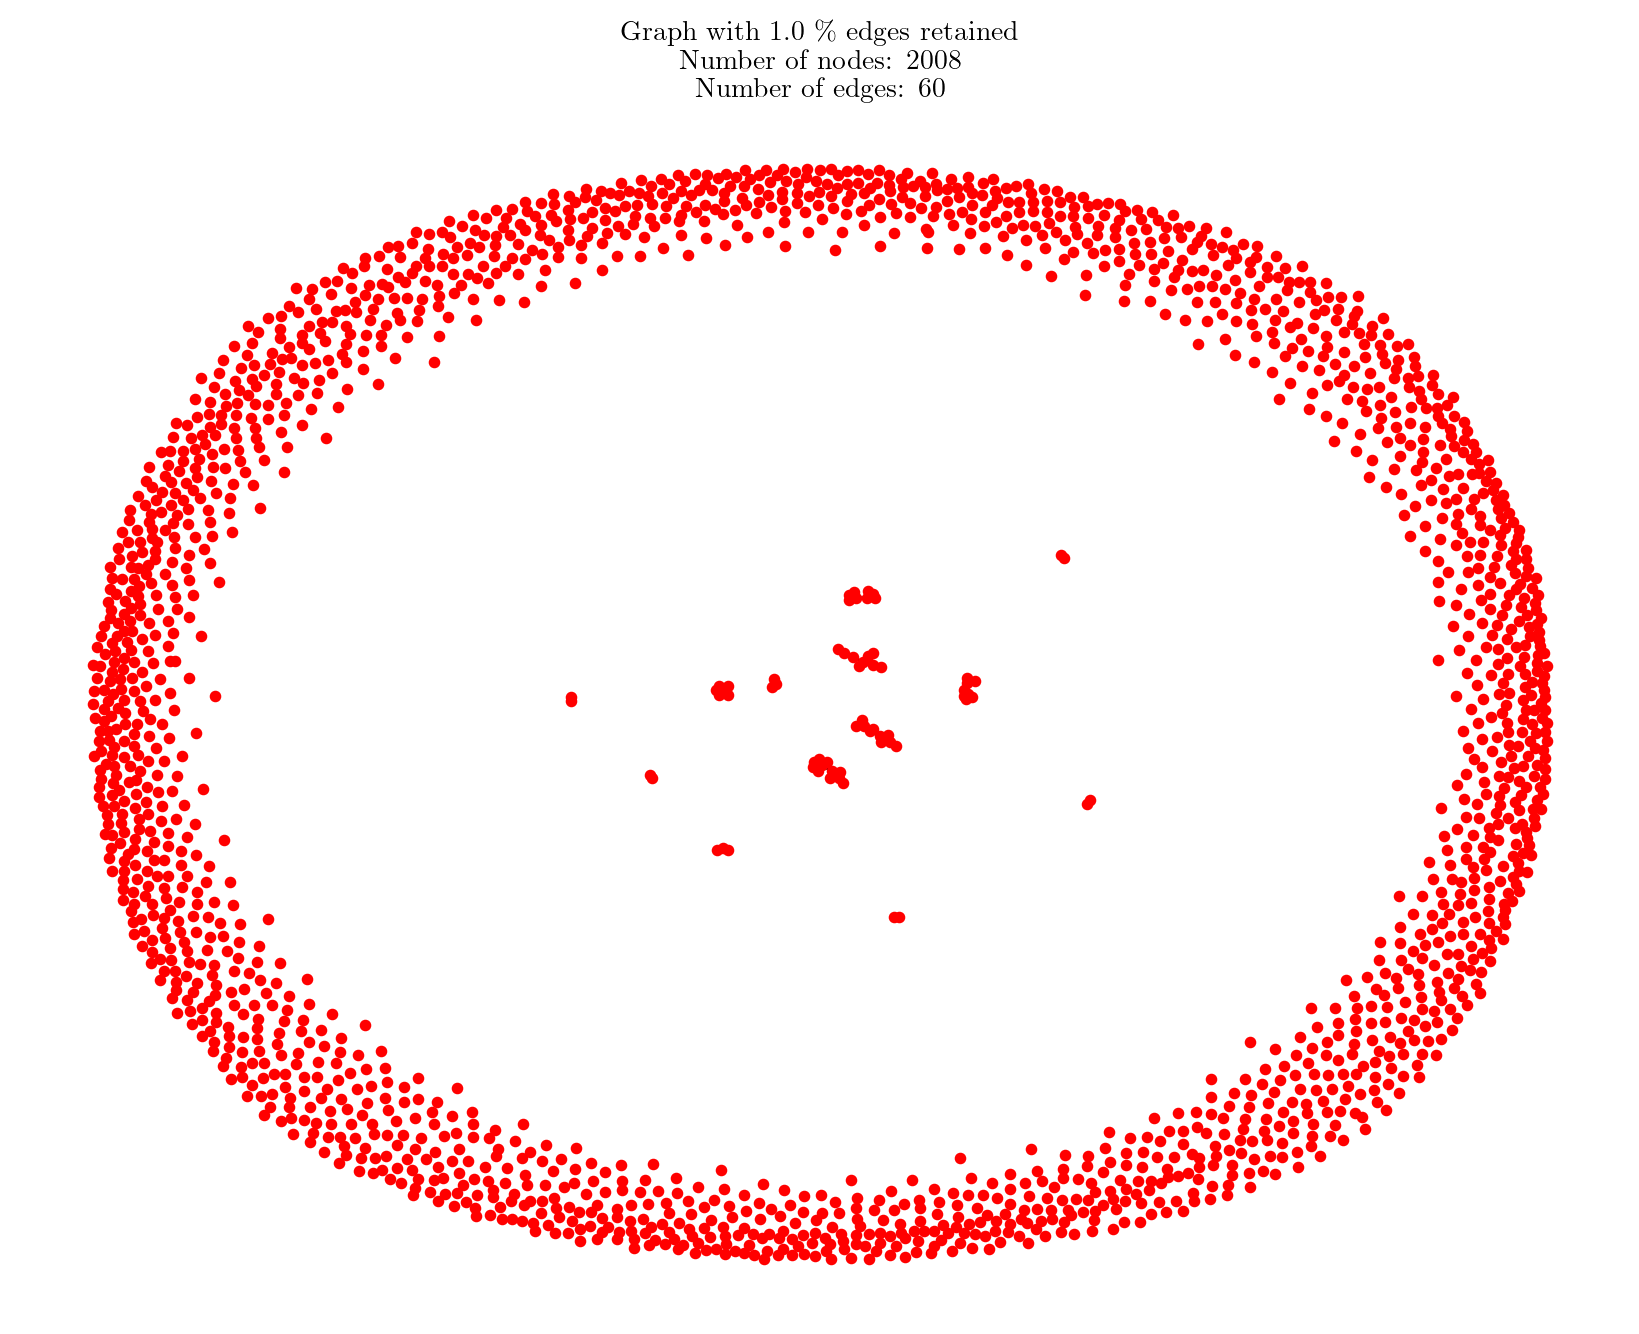

In [101]:
for idx, graph in enumerate(SparseAmzGraphs):
    plt.figure(figsize = (8, 6))
    nx.draw(graph, with_labels = False, node_size = 10, node_color = "red", edge_color = "black", pos = nx.spring_layout(graph, scale = 4))
    plt.title(fr"Graph with {100 * k_values[idx]} \% edges retained" "\n" "Number of nodes: " f"{graph.number_of_nodes()}" "\n" "Number of edges: " f"{graph.number_of_edges()}")
    plt.show()